# Turkiye Super Leauge 2022/2023 Season Prediction Model
### Introduction to Data Science (MAT 381E) - Final Project
#### Team Members:
#### Yiğit Berk SARIBOĞA 
#### Deniz AKIŞ

First we imported the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel
from sklearn.metrics import mean_squared_error
import warnings

In predicting player strengths, we first used the Overall variable, which gives the data of total strengths, and then we made an analysis with prediction for attributes such as Acceleration, Finishing, Stamina, Dribbling, Strength, Stamina. For each attribute, we repeatedly extracted correlation strengths specific to each year and measured the strength of our prediction. It also gave us an idea of how these effects affect the league standings.

# FIFA 17

### FIFA 17 - Overall

Ingesting player attributes data for FIFA 2017.

In [2]:
data17 = pd.read_csv("FullData.csv")
data17 = data17.sort_values(by="Rating", ascending = False)
data17

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,NaN,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,NaN,Longford Town,Sub,28.0,01/01/2016,2020.0,45,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,NaN,Swindon Town,Res,32.0,03/03/2015,2023.0,45,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,NaN,Ross County,Sub,45.0,03/02/2016,2017.0,45,...,12,13,12,24,12,40,45,44,43,45


Extraction of data of Super League teams

In [3]:
data17 = data17[["Name", "Age", "Rating","Acceleration","Finishing","Dribbling","Strength","Stamina", "Club", "Height"]]
adana17 = data17[data17["Club"] == "Adanaspor"]
akhisar17 = data17[data17["Club"] == "Akhisarspor"]
antalya17 = data17[data17["Club"] == "Antalyaspor"]
besiktas17 = data17[data17["Club"] == "Beşiktaş"]
alanya17 = data17[data17["Club"] == "Aytemiz Alanyaspor"]
bursa17 = data17[data17["Club"] == "Bursaspor"]
rize17 = data17[data17["Club"] == "Çaykur Rizespor"]
gaziantep17 = data17[data17["Club"] == "Gaziantepspor"]
genclerbirligi17 = data17[data17["Club"] == "Gençlerbirliği"]
fenerbahce17 = data17[data17["Club"] == "Fenerbahçe"]
galatasaray17 = data17[data17["Club"] == "Galatasaray"]
osmanli17 = data17[data17["Club"] == "Osmanlıspor"]
basaksehir17 = data17[data17["Club"] == "Medipol Başakşehir"]
kasimpasa17 = data17[data17["Club"] == "Kasimpaşa"]
kayseri17 = data17[data17["Club"] == "Kayserispor"]
konya17 = data17[data17["Club"] == "Konyaspor"]
trabzon17 = data17[data17["Club"] == "Trabzonspor"]
karabuk17 = data17[data17["Club"] == "Karabükspor"]
data17

,Name,Age,Rating,Acceleration,Finishing,Dribbling,Strength,Stamina,Club,Height
0,Cristiano Ronaldo,32,94,91,93,92,80,92,Real Madrid,185 cm
1,Lionel Messi,29,93,92,95,97,59,74,FC Barcelona,170 cm
2,Neymar,25,92,93,89,96,49,79,FC Barcelona,174 cm
3,Luis Suárez,30,92,88,94,86,76,89,FC Barcelona,182 cm
4,Manuel Neuer,31,92,58,13,30,83,44,FC Bayern,193 cm
...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,19,45,25,13,11,52,17,Wexford Youths,183 cm
17584,Dylan McGoey,19,45,16,12,11,42,21,Longford Town,185 cm
17585,Tommy Ouldridge,18,45,62,28,39,34,64,Swindon Town,173 cm
17586,Mark Foden,21,45,42,14,13,61,40,Ross County,180 cm


In [4]:
teams17 = [adana17, akhisar17, antalya17, besiktas17, alanya17, bursa17, rize17, gaziantep17, 
           fenerbahce17, galatasaray17, genclerbirligi17, osmanli17, basaksehir17, kasimpasa17, 
           kayseri17, konya17, trabzon17, karabuk17]

"dfmaker" is a function that takes team data and a player attribute as input and displays as output the ranking of super league teams in that season according to the desired attribute.

In [5]:
def dfmaker(teams, clubname: str, feature: str) -> str:
    t = []
    for i in range(len(teams)):
        t.append(teams[i].iloc[0][clubname])
    team_overalls = []
    for i in range(len(teams)):
        team_overalls.append(teams[i].describe()[feature]["mean"])
    d = {"Teams": t, feature: team_overalls}
    df = pd.DataFrame(d)
    df = df.sort_values(by = feature, ascending = False)
    return df

Obtaining the table according to the rating

In [6]:
df17 = dfmaker(teams17,"Club","Rating")
df17

,Teams,Rating
3,Beşiktaş,74.466667
8,Fenerbahçe,73.133333
16,Trabzonspor,72.250000
12,Medipol Başakşehir,72.076923
9,Galatasaray,71.966667
11,Osmanlıspor,70.200000
5,Bursaspor,69.533333
15,Konyaspor,69.000000
7,Gaziantepspor,68.633333
14,Kayserispor,68.576923


In [7]:
sorting17 = []
for i in range(18):
    sorting17.append(i+1)
    i+1
sorting17.sort(reverse = True)
sorting17

[18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

Creating a list of team names based on the actual standings of the season

In [8]:
realt17 = ["Beşiktaş", "Medipol Başakşehir", "Fenerbahçe", "Galatasaray", "Antalyaspor", "Trabzonspor", "Akhisarspor",
          "Gençlerbirliği", "Konyaspor", "Kasimpaşa", "Karabükspor", "Aytemiz Alanyaspor", "Osmanlıspor", "Bursaspor", "Kayserispor",
          "Çaykur Rizespor", "Gaziantepspor", "Adanaspor"]

In [9]:
def realt(realt, sorting, df, value: str) -> str:
    dfreal = pd.DataFrame({"Teams": realt, "Real Ranking": sorting})
    real = dfreal["Teams"].tolist()
    merged_df = pd.merge(df, dfreal, on = "Teams")
    newmerged_df = merged_df[[value, "Real Ranking"]]
    newmerged_df.columns = [value, "Real Ranking"]
    newmerged_df.index = merged_df["Teams"].tolist()
    newmerged_df.sort_values(by = "Real Ranking", ascending = False, inplace = True)
    return newmerged_df, real, dfreal

In [10]:
warnings.filterwarnings('ignore')

In [11]:
newmerged_df_17, real17, dfreal17 = realt(realt17,sorting17,df17,"Rating")
newmerged_df_17

,Rating,Real Ranking
Beşiktaş,74.466667,18
Medipol Başakşehir,72.076923,17
Fenerbahçe,73.133333,16
Galatasaray,71.966667,15
Antalyaspor,67.300000,14
Trabzonspor,72.250000,13
Akhisarspor,68.444444,12
Gençlerbirliği,68.280000,11
Konyaspor,69.000000,10
Kasimpaşa,68.200000,9


"prediction" function is a function that provides a prediction model by applying linear regression according to the desired attribute.

In [12]:
def prediction(newmerged_df,sorting,real,value: str) -> str:
    overalls = newmerged_df[value].tolist()
    data = {"Değişken1": sorting,
        "Değişken2": overalls}
    df = pd.DataFrame(data)
    
    model = LinearRegression()
    X = df[["Değişken2"]]
    y = df["Değişken1"]
    
    model.fit(X, y)
    y_pred = model.predict(X)
    prediction = y_pred.tolist()
    
    dict_ = {}
    dict_ = {"Approaches": prediction, "Real Ranking": sorting}
    temp = pd.DataFrame(dict_)
    raw = temp.sort_values(by = "Real Ranking", ascending = False)
    raw.index = real
    raw = raw.copy()
    raw.sort_values(by = "Approaches", ascending = False, inplace = True)
    raw["Estimated Ranking"] = sorting
    return raw.sort_values(by = "Real Ranking", ascending = False)

In [13]:
raw_17 = prediction(newmerged_df_17,sorting17,real17,"Rating")
raw_17

,Approaches,Real Ranking,Estimated Ranking
Beşiktaş,17.639997,18,18
Medipol Başakşehir,13.799495,17,15
Fenerbahçe,15.497228,16,17
Galatasaray,13.622305,15,14
Antalyaspor,6.122613,14,4
Trabzonspor,14.077643,13,16
Akhisarspor,7.961823,12,8
Gençlerbirliği,7.697548,11,7
Konyaspor,8.854643,10,11
Kasimpaşa,7.568982,9,6


Showing the correlation between estimated and real rankings as heatmap.

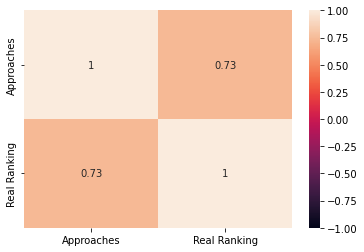

In [14]:
corr17 = raw_17[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17, vmin=-1, vmax=1, annot=True)
plt.show()

The "mse" function is a function that calculates the mean squared error and tells us the test power of the model.

In [15]:
def mse(y,y_pred):
    mse = mean_squared_error(y, y_pred)
    # Calculation of Cohen's d statistic using MSE value
    n = len(y)
    mean_difference = np.mean(y_pred - y)
    standard_deviation = np.sqrt(mse)
    cohens_d = mean_difference / standard_deviation
    if cohens_d > 0.2:
        print("Model with high test power")
    elif cohens_d > 0.1:
        print("Model with average test power")
    else:
        print("Model with low test power")   
    print("\nmse value:",mse,"\n\ncohens d:",cohens_d)
    return mse

In [16]:
mse17 = mse(raw_17["Approaches"], raw_17["Estimated Ranking"])

Model with low test power

mse value: 3.3364493411633913 

cohens d: 1.2966616951955524e-15


Creating a table comparing the estimated and real ranking according to overall attribute.

In [17]:
replace_values17 = {1 : 18, 2 : 17, 3 : 16, 4 : 15 , 5 : 14, 6 : 13, 7 : 12, 8 : 11, 9 : 10, 10 : 9, 11 : 8, 12 : 7, 13 : 6, 14 : 5, 15 : 4, 16 : 3, 17 : 2, 18 : 1}                                                                                          
new_17 = raw_17.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17 = new_17[['Real Ranking', 'Estimated Ranking']].copy()
new17

,Real Ranking,Estimated Ranking
Beşiktaş,1,1
Medipol Başakşehir,2,4
Fenerbahçe,3,2
Galatasaray,4,5
Antalyaspor,5,15
Trabzonspor,6,3
Akhisarspor,7,11
Gençlerbirliği,8,12
Konyaspor,9,8
Kasimpaşa,10,13


In [18]:
new17.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.614035
Estimated Ranking,0.614035,1.000000


In the next part of the project, we will create prediction models using linear regression according to the Overall, Acceleration, Finishing, Dribbling, Strength and Stamina attributes of the players in the FIFA game between 2017-2022. Then we will examine the correlation of these models with the reality and decide which feature we will create a prediction model according to in 2023.

### FIFA 17 - Acceleration

In [19]:
df17_acc = dfmaker(teams17,"Club","Acceleration")
df17_acc

,Teams,Acceleration
16,Trabzonspor,71.333333
8,Fenerbahçe,69.266667
9,Galatasaray,68.233333
10,Gençlerbirliği,67.520000
7,Gaziantepspor,67.100000
12,Medipol Başakşehir,67.038462
13,Kasimpaşa,66.840000
1,Akhisarspor,66.666667
11,Osmanlıspor,66.366667
2,Antalyaspor,66.300000


In [20]:
newmerged_df_17_acc, real17_acc, dfreal17_acc = realt(realt17,sorting17,df17_acc,"Acceleration")
raw_17_acc = prediction(newmerged_df_17_acc,sorting17,real17_acc,"Acceleration")
raw_17_acc

,Approaches,Real Ranking,Estimated Ranking
Beşiktaş,9.469419,18,8
Medipol Başakşehir,10.500408,17,13
Fenerbahçe,13.353687,16,17
Galatasaray,12.030475,15,16
Antalyaspor,9.554787,14,9
Trabzonspor,16.000112,13,18
Akhisarspor,10.024314,12,11
Gençlerbirliği,11.117032,11,15
Konyaspor,5.168979,10,2
Kasimpaşa,10.246272,9,12


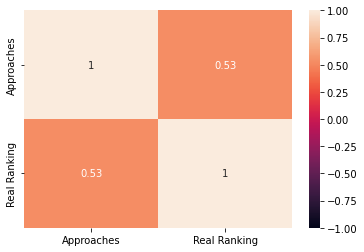

In [21]:
corr17_acc = raw_17_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [22]:
mse17_acc = mse(raw_17_acc["Approaches"], raw_17_acc["Estimated Ranking"])

Model with low test power

mse value: 7.51429002641183 

cohens d: -1.7280446829089594e-15


In [23]:
new_17_acc = raw_17_acc.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17_acc = new_17_acc[['Real Ranking', 'Estimated Ranking']].copy()
new17_acc

,Real Ranking,Estimated Ranking
Beşiktaş,1,11
Medipol Başakşehir,2,6
Fenerbahçe,3,2
Galatasaray,4,3
Antalyaspor,5,10
Trabzonspor,6,1
Akhisarspor,7,8
Gençlerbirliği,8,4
Konyaspor,9,17
Kasimpaşa,10,7


In [24]:
new17_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.529412
Estimated Ranking,0.529412,1.000000


### FIFA 17 - Finishing

In [25]:
df17_fns = dfmaker(teams17,"Club","Finishing")
df17_fns

,Teams,Finishing
3,Beşiktaş,52.600000
16,Trabzonspor,52.458333
8,Fenerbahçe,51.533333
12,Medipol Başakşehir,50.461538
9,Galatasaray,49.733333
10,Gençlerbirliği,48.920000
5,Bursaspor,48.533333
13,Kasimpaşa,48.440000
1,Akhisarspor,48.074074
7,Gaziantepspor,47.800000


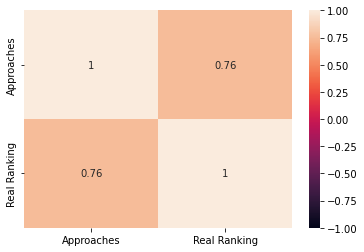

In [26]:
newmerged_df_17_fns, real17_fns, dfreal17_fns = realt(realt17,sorting17,df17_fns,"Finishing")
raw_17_fns = prediction(newmerged_df_17_fns,sorting17,real17_fns,"Finishing")

corr17_fns = raw_17_fns[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [27]:
mse17_fns = mse(raw_17_fns["Approaches"], raw_17_fns["Estimated Ranking"])

Model with low test power

mse value: 2.4581413207520533 

cohens d: -5.035519368069532e-16


In [28]:
new_17_fns = raw_17_fns.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17_fns = new_17_fns[['Real Ranking', 'Estimated Ranking']].copy()
new17_fns

,Real Ranking,Estimated Ranking
Beşiktaş,1,1
Medipol Başakşehir,2,4
Fenerbahçe,3,3
Galatasaray,4,5
Antalyaspor,5,11
Trabzonspor,6,2
Akhisarspor,7,9
Gençlerbirliği,8,6
Konyaspor,9,15
Kasimpaşa,10,8


In [29]:
new17_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.750258
Estimated Ranking,0.750258,1.000000


### FIFA 17 - Dribbling

In [30]:
df17_drb = dfmaker(teams17,"Club","Dribbling")
df17_drb

,Teams,Dribbling
3,Beşiktaş,63.866667
16,Trabzonspor,63.416667
9,Galatasaray,63.333333
8,Fenerbahçe,62.433333
5,Bursaspor,61.166667
12,Medipol Başakşehir,61.076923
7,Gaziantepspor,60.500000
10,Gençlerbirliği,60.040000
1,Akhisarspor,58.962963
13,Kasimpaşa,58.880000


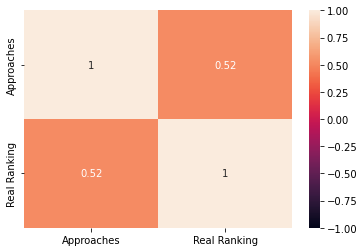

In [31]:
newmerged_df_17_drb, real17_drb, dfreal17_drb = realt(realt17,sorting17,df17_drb,"Dribbling")
raw_17_drb = prediction(newmerged_df_17_drb,sorting17,real17_drb,"Dribbling")

corr17_drb = raw_17_drb[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [32]:
mse17_drb = mse(raw_17_drb["Approaches"], raw_17_drb["Estimated Ranking"])

Model with low test power

mse value: 6.464730376786714 

cohens d: 2.7945700190828115e-15


In [33]:
new_17_drb = raw_17_drb.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17_drb = new_17_drb[['Real Ranking', 'Estimated Ranking']].copy()
new17_drb

,Real Ranking,Estimated Ranking
Beşiktaş,1,1
Medipol Başakşehir,2,6
Fenerbahçe,3,4
Galatasaray,4,3
Antalyaspor,5,17
Trabzonspor,6,2
Akhisarspor,7,9
Gençlerbirliği,8,8
Konyaspor,9,16
Kasimpaşa,10,10


In [34]:
new17_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.00000,0.52322
Estimated Ranking,0.52322,1.00000


### FIFA 17 - Strength

In [35]:
df17_str = dfmaker(teams17,"Club","Strength")
df17_str

,Teams,Strength
3,Beşiktaş,71.033333
13,Kasimpaşa,69.240000
14,Kayserispor,68.769231
16,Trabzonspor,68.750000
2,Antalyaspor,68.300000
7,Gaziantepspor,68.033333
17,Karabükspor,67.653846
10,Gençlerbirliği,67.440000
11,Osmanlıspor,66.800000
8,Fenerbahçe,66.766667


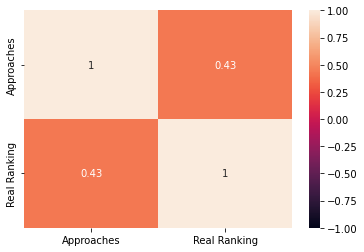

In [36]:
newmerged_df_17_str, real17_str, dfreal17_str = realt(realt17,sorting17,df17_str,"Strength")
raw_17_str = prediction(newmerged_df_17_str,sorting17,real17_str,"Strength")

corr17_str = raw_17_str [["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [37]:
mse17_str = mse(raw_17_str["Approaches"], raw_17_str["Estimated Ranking"])

Model with low test power

mse value: 9.140463841829451 

cohens d: -5.222681871474014e-16


In [38]:
new_17_str = raw_17_str.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17_str = new_17_str[['Real Ranking', 'Estimated Ranking']].copy()
new17_str

,Real Ranking,Estimated Ranking
Beşiktaş,1,1
Medipol Başakşehir,2,14
Fenerbahçe,3,10
Galatasaray,4,11
Antalyaspor,5,5
Trabzonspor,6,4
Akhisarspor,7,13
Gençlerbirliği,8,8
Konyaspor,9,12
Kasimpaşa,10,2


In [39]:
new17_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.308566
Estimated Ranking,0.308566,1.000000


### FIFA 17 - Stamina

In [40]:
df17_stm = dfmaker(teams17,"Club","Stamina")
df17_stm

,Teams,Stamina
16,Trabzonspor,73.000000
8,Fenerbahçe,67.633333
3,Beşiktaş,67.200000
12,Medipol Başakşehir,67.038462
1,Akhisarspor,65.703704
4,Aytemiz Alanyaspor,65.433333
14,Kayserispor,65.153846
9,Galatasaray,64.766667
10,Gençlerbirliği,64.240000
13,Kasimpaşa,64.120000


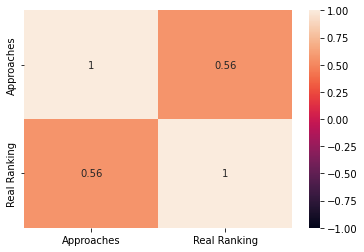

In [41]:
newmerged_df_17_stm, real17_stm, dfreal17_stm = realt(realt17,sorting17,df17_stm,"Stamina")
raw_17_stm = prediction(newmerged_df_17_stm,sorting17,real17_stm,"Stamina")

corr17_stm = raw_17_stm [["Approaches","Real Ranking"]].corr()
sns.heatmap(corr17_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [42]:
mse17_stm = mse(raw_17_stm["Approaches"], raw_17_stm["Estimated Ranking"])

Model with low test power

mse value: 8.735365167160971 

cohens d: -3.2054455797778935e-15


In [43]:
new_17_stm = raw_17_stm.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new17_stm = new_17_stm[['Real Ranking', 'Estimated Ranking']].copy()
new17_stm

,Real Ranking,Estimated Ranking
Beşiktaş,1,3
Medipol Başakşehir,2,4
Fenerbahçe,3,2
Galatasaray,4,8
Antalyaspor,5,17
Trabzonspor,6,1
Akhisarspor,7,5
Gençlerbirliği,8,9
Konyaspor,9,11
Kasimpaşa,10,10


In [44]:
new17_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.647059
Estimated Ranking,0.647059,1.000000


# FIFA 18

### FIFA 18 - Overall

Ingesting player attributes data for FIFA 2018

In [45]:
data18 = pd.read_csv("CompleteDataset.csv")
data18 = data18.sort_values(by = "Overall", ascending = False)
data18

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


Fixing in64 data type error caused by dataset

In [46]:
def mlist(data,feature: str) -> str:
    mlist = data[feature].tolist()
    for i, s in enumerate(mlist):
        if '+' in s:
            mlist[i] = s[:s.index('+')]
        elif '-' in s:
            mlist[i] = s[:s.index('-')]   
    data[feature] = mlist
    data[feature] = data[feature].astype("int64")

In [47]:
mlist(data18,"Acceleration")
mlist(data18,"Finishing")
mlist(data18,"Dribbling")
mlist(data18,"Strength")
mlist(data18,"Stamina")

In [48]:
data18 = data18[["Name", "Age", "Overall", "Club", "Acceleration", "Finishing", "Dribbling","Strength","Stamina", "Value"]]
akhisar18 = data18[data18["Club"] == "Akhisar Belediyespor"]
antalya18 = data18[data18["Club"] == "Antalyaspor"]
besiktas18 = data18[data18["Club"] == "Beşiktaş JK"]
alanya18 = data18[data18["Club"] == "Alanyaspor"]
bursa18 = data18[data18["Club"] == "Bursaspor"]
fenerbahce18 = data18[data18["Club"] == "Fenerbahçe SK"]
galatasaray18 = data18[data18["Club"] == "Galatasaray SK"]
osmanli18 = data18[data18["Club"] == "Osmanlıspor"]
basaksehir18 = data18[data18["Club"] == "İstanbul Başakşehir FK"]
kasimpasa18 = data18[data18["Club"] == "Kasimpaşa SK"]
kayseri18 = data18[data18["Club"] == "Kayserispor"]
konya18 = data18[data18["Club"] == "Atiker Konyaspor"]
sivas18 = data18[data18["Club"] == "Medicana Sivasspor"]
trabzon18 = data18[data18["Club"] == "Trabzonspor"]
karabuk18 = data18[data18["Club"] == "Kardemir Karabükspor"]
genclerbirligi18 = data18[data18["Club"] == "Gençlerbirliği SK"]
goztepe18 = data18[data18["Club"] == "Göztepe"]
malatya18 = data18[data18["Club"] == "Evkur Yeni Malatyaspor"]
data18

,Name,Age,Overall,Club,Acceleration,Finishing,Dribbling,Strength,Stamina,Value
0,Cristiano Ronaldo,32,94,Real Madrid CF,89,94,91,80,92,€95.5M
1,L. Messi,30,93,FC Barcelona,92,95,97,59,73,€105M
2,Neymar,25,92,Paris Saint-Germain,94,89,96,53,78,€123M
3,L. Suárez,30,92,FC Barcelona,88,94,86,80,89,€97M
4,M. Neuer,31,92,FC Bayern Munich,58,13,30,83,44,€61M
...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,46,Scunthorpe United,24,5,12,50,28,€50K
17977,B. Richardson,47,46,Wycombe Wanderers,25,11,11,47,32,€0
17978,J. Young,17,46,Swindon Town,66,47,37,32,33,€60K
17979,J. Lundstram,18,46,Crewe Alexandra,57,32,41,46,49,€60K


In [49]:
for index, row in data18.iterrows():
    value = row["Value"]
    if isinstance(value, str):
        if "M" in value:
            value = int(float(value.replace("€", "").replace("M", "")) * 1000000)
        elif "K" in value:
            value = int(float(value.replace("€", "").replace("K", "")) * 1000)
        else:
            value = int(float(value.replace("€", "")))
        data18.loc[index, "Value"] = value

In [50]:
teams18 = [akhisar18, antalya18, besiktas18, alanya18, bursa18, genclerbirligi18, fenerbahce18, galatasaray18, 
           osmanli18, basaksehir18, kasimpasa18, kayseri18, konya18, sivas18, trabzon18, karabuk18, goztepe18, malatya18]

In [51]:
df18 = dfmaker(teams18,"Club","Overall")
df18

,Teams,Overall
2,Beşiktaş JK,75.615385
7,Galatasaray SK,73.241379
6,Fenerbahçe SK,72.928571
14,Trabzonspor,72.000000
9,İstanbul Başakşehir FK,71.222222
8,Osmanlıspor,70.269231
4,Bursaspor,69.965517
11,Kayserispor,69.571429
1,Antalyaspor,69.448276
15,Kardemir Karabükspor,68.583333


In [52]:
sorting18 = []
for i in range(18):
    sorting18.append(i+1)
    i+1
sorting18.sort(reverse = True)

In [53]:
realt18 = ["Galatasaray SK", "Fenerbahçe SK", "İstanbul Başakşehir FK", "Beşiktaş JK", "Trabzonspor", "Göztepe", 
           "Medicana Sivasspor", "Kasimpaşa SK", "Kayserispor", "Evkur Yeni Malatyaspor", "Akhisar Belediyespor", "Alanyaspor",
          "Bursaspor", "Antalyaspor", "Atiker Konyaspor", "Osmanlıspor", "Gençlerbirliği SK", "Kardemir Karabükspor"]

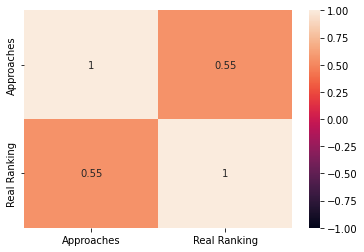

In [54]:
newmerged_df_18, real18, dfreal18 = realt(realt18,sorting18,df18,"Overall")
raw_18 = prediction(newmerged_df_18,sorting18,real18,"Overall")

corr18 = raw_18[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18, vmin=-1, vmax=1, annot=True)
plt.show()

In [55]:
mse18 = mse(raw_18["Approaches"], raw_18["Estimated Ranking"])

Model with low test power

mse value: 6.459296802305155 

cohens d: -4.038298580594267e-15


In [56]:
replace_values18 = {1 : 18, 2 : 17, 3 : 16, 4 : 15 , 5 : 14, 6 : 13, 7 : 12, 8 : 11, 9 : 10, 10 : 9, 11 : 8, 12 : 7, 13 : 6, 14 : 5, 15 : 4, 16 : 3, 17 : 2, 18 : 1}                                                                                          
new_18 = raw_18.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18 = new_18[['Real Ranking', 'Estimated Ranking']].copy()
new18

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Fenerbahçe SK,2,3
İstanbul Başakşehir FK,3,5
Beşiktaş JK,4,1
Trabzonspor,5,4
Göztepe,6,12
Medicana Sivasspor,7,17
Kasimpaşa SK,8,15
Kayserispor,9,8
Evkur Yeni Malatyaspor,10,18


In [57]:
new18.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.463364
Estimated Ranking,0.463364,1.000000


### FIFA 18 - Acceleration

In [58]:
df18_acc = dfmaker(teams18,"Club","Acceleration")
df18_acc

,Teams,Acceleration
14,Trabzonspor,69.384615
1,Antalyaspor,67.620690
0,Akhisar Belediyespor,67.384615
10,Kasimpaşa SK,66.840000
7,Galatasaray SK,66.827586
5,Gençlerbirliği SK,66.333333
12,Atiker Konyaspor,66.259259
13,Medicana Sivasspor,66.133333
2,Beşiktaş JK,66.000000
15,Kardemir Karabükspor,65.708333


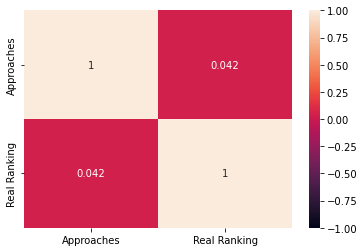

In [59]:
newmerged_df_18_acc, real18_acc, dfreal18_acc = realt(realt18,sorting18,df18_acc,"Acceleration")
raw_18_acc = prediction(newmerged_df_18_acc,sorting18,real18_acc,"Acceleration")

corr18_acc = raw_18_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [60]:
mse18_acc = mse(raw_18_acc["Approaches"], raw_18_acc["Estimated Ranking"])

Model with low test power

mse value: 24.87071988814131 

cohens d: -1.385197086040513e-16


In [61]:
new_18_acc = raw_18_acc.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18_acc = new_18_acc[['Real Ranking', 'Estimated Ranking']].copy()
new18_acc

,Real Ranking,Estimated Ranking
Galatasaray SK,1,5
Fenerbahçe SK,2,17
İstanbul Başakşehir FK,3,11
Beşiktaş JK,4,9
Trabzonspor,5,1
Göztepe,6,13
Medicana Sivasspor,7,8
Kasimpaşa SK,8,4
Kayserispor,9,14
Evkur Yeni Malatyaspor,10,18


In [62]:
new18_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,-0.007224
Estimated Ranking,-0.007224,1.000000


### FIFA 18 - Finishing

In [63]:
df18_fns = dfmaker(teams18,"Club","Finishing")
df18_fns

,Teams,Finishing
14,Trabzonspor,52.807692
2,Beşiktaş JK,52.115385
6,Fenerbahçe SK,51.285714
7,Galatasaray SK,50.620690
8,Osmanlıspor,49.538462
0,Akhisar Belediyespor,49.038462
1,Antalyaspor,47.827586
17,Evkur Yeni Malatyaspor,47.733333
9,İstanbul Başakşehir FK,47.629630
15,Kardemir Karabükspor,47.625000


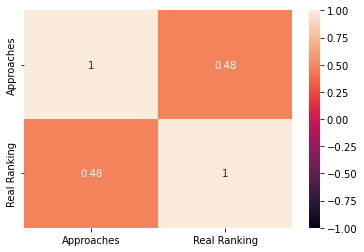

In [64]:
newmerged_df_18_fns, real18_fns, dfreal18_fns = realt(realt18,sorting18,df18_fns,"Finishing")
raw_18_fns = prediction(newmerged_df_18_fns,sorting18,real18_fns,"Finishing")

corr18_fns = raw_18_fns[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [65]:
mse18_fns = mse(raw_18_fns["Approaches"], raw_18_fns["Estimated Ranking"])

Model with low test power

mse value: 8.12384528265207 

cohens d: 1.9389424213249616e-15


In [66]:
new_18_fns = raw_18_fns.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18_fns = new_18[['Real Ranking', 'Estimated Ranking']].copy()
new18_fns

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Fenerbahçe SK,2,3
İstanbul Başakşehir FK,3,5
Beşiktaş JK,4,1
Trabzonspor,5,4
Göztepe,6,12
Medicana Sivasspor,7,17
Kasimpaşa SK,8,15
Kayserispor,9,8
Evkur Yeni Malatyaspor,10,18


In [67]:
new18_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.463364
Estimated Ranking,0.463364,1.000000


### FIFA 18 - Dribbling

In [68]:
df18_drb = dfmaker(teams18,"Club","Dribbling")
df18_drb

,Teams,Dribbling
7,Galatasaray SK,63.517241
2,Beşiktaş JK,63.230769
14,Trabzonspor,63.192308
6,Fenerbahçe SK,61.071429
9,İstanbul Başakşehir FK,60.814815
0,Akhisar Belediyespor,60.269231
8,Osmanlıspor,60.076923
4,Bursaspor,59.965517
11,Kayserispor,59.500000
12,Atiker Konyaspor,59.000000


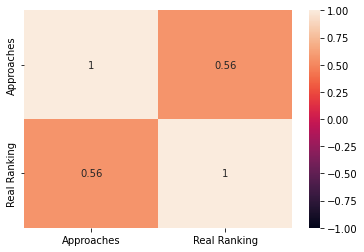

In [69]:
newmerged_df_18_drb, real18_drb, dfreal18_drb = realt(realt18,sorting18,df18_drb,"Dribbling")
raw_18_drb = prediction(newmerged_df_18_drb,sorting18,real18_drb,"Dribbling")

corr18_drb = raw_18_drb[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [70]:
mse18_drb = mse(raw_18_drb["Approaches"], raw_18_drb["Estimated Ranking"])

Model with low test power

mse value: 5.720729725335005 

cohens d: -4.786190512389925e-15


In [71]:
new_18_drb = raw_18_drb.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18_drb = new_18[['Real Ranking', 'Estimated Ranking']].copy()
new18_drb

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Fenerbahçe SK,2,3
İstanbul Başakşehir FK,3,5
Beşiktaş JK,4,1
Trabzonspor,5,4
Göztepe,6,12
Medicana Sivasspor,7,17
Kasimpaşa SK,8,15
Kayserispor,9,8
Evkur Yeni Malatyaspor,10,18


In [72]:
new18_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.463364
Estimated Ranking,0.463364,1.000000


### FIFA 18 - Strength

In [73]:
df18_str = dfmaker(teams18,"Club","Strength")
df18_str

,Teams,Strength
2,Beşiktaş JK,71.692308
1,Antalyaspor,70.310345
10,Kasimpaşa SK,68.520000
14,Trabzonspor,68.000000
11,Kayserispor,67.821429
7,Galatasaray SK,67.758621
15,Kardemir Karabükspor,67.750000
8,Osmanlıspor,67.538462
6,Fenerbahçe SK,67.428571
5,Gençlerbirliği SK,67.133333


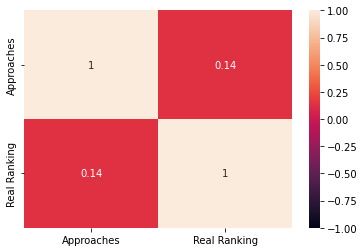

In [74]:
newmerged_df_18_str, real18_str, dfreal18_str = realt(realt18,sorting18,df18_str,"Strength")
raw_18_str = prediction(newmerged_df_18_str,sorting18,real18_str,"Strength")

corr18_str = raw_18_str[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [75]:
mse18_str = mse(raw_18_str["Approaches"], raw_18_str["Estimated Ranking"])

Model with low test power

mse value: 20.28248279767519 

cohens d: 1.4462423833482966e-15


In [76]:
new_18_str = raw_18_str.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18_str = new_18[['Real Ranking', 'Estimated Ranking']].copy()
new18_str

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Fenerbahçe SK,2,3
İstanbul Başakşehir FK,3,5
Beşiktaş JK,4,1
Trabzonspor,5,4
Göztepe,6,12
Medicana Sivasspor,7,17
Kasimpaşa SK,8,15
Kayserispor,9,8
Evkur Yeni Malatyaspor,10,18


In [77]:
new18_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.463364
Estimated Ranking,0.463364,1.000000


### FIFA 18 - Stamina

In [78]:
df18_stm = dfmaker(teams18,"Club","Stamina")
df18_stm

,Teams,Stamina
14,Trabzonspor,68.500000
6,Fenerbahçe SK,67.178571
0,Akhisar Belediyespor,66.307692
2,Beşiktaş JK,66.230769
15,Kardemir Karabükspor,65.458333
1,Antalyaspor,65.310345
7,Galatasaray SK,65.172414
8,Osmanlıspor,65.038462
11,Kayserispor,64.892857
4,Bursaspor,64.827586


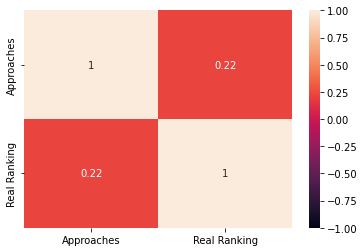

In [79]:
newmerged_df_18_stm, real18_stm, dfreal18_stm = realt(realt18,sorting18,df18_stm,"Stamina")
raw_18_stm = prediction(newmerged_df_18_stm,sorting18,real18_stm,"Stamina")

corr18_stm = raw_18_stm[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr18_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [80]:
new_18_stm = raw_18_stm.replace(replace_values18).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new18_stm = new_18[['Real Ranking', 'Estimated Ranking']].copy()
new18_stm

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Fenerbahçe SK,2,3
İstanbul Başakşehir FK,3,5
Beşiktaş JK,4,1
Trabzonspor,5,4
Göztepe,6,12
Medicana Sivasspor,7,17
Kasimpaşa SK,8,15
Kayserispor,9,8
Evkur Yeni Malatyaspor,10,18


In [81]:
new18_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.463364
Estimated Ranking,0.463364,1.000000


# FIFA19

### FIFA 19 - Overall

Ingesting player attributes data for FIFA 2019

In [82]:
data19 = pd.read_csv("FIFA19.csv")
data19 = data19.sort_values(by="Overall", ascending = False)
data19

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18130,18190,L. Watkins,18,England,47,67,Cambridge United,€60K,€1K,Right,...,44.0,47.0,13.0,7.0,14.0,10.0,8.0,€165K,0,No Speciality
18129,18189,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,€60K,€1K,Right,...,15.0,22.0,15.0,5.0,14.0,12.0,8.0,€125K,0,No Speciality
18127,18187,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,€40K,€1K,Right,...,42.0,42.0,13.0,12.0,11.0,15.0,12.0,€66K,0,No Speciality
18126,18186,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,€60K,€1K,Right,...,41.0,51.0,15.0,7.0,14.0,6.0,8.0,€167K,CSL,No Speciality


In [83]:
data19 = data19[["Name", "Age", "Overall","Acceleration","Finishing","Dribbling","Strength","Stamina", "Club", "Height", "Value"]]
antalya19 = data19[data19["Club"] == "Antalyaspor"]
besiktas19 = data19[data19["Club"] == "Beşiktaş JK"]
alanya19 = data19[data19["Club"] == "Alanyaspor"]
akhisar19 = data19[data19["Club"] == "Akhisar Belediyespor"]
fenerbahce19 = data19[data19["Club"] == "Fenerbahçe SK"]
galatasaray19 = data19[data19["Club"] == "Galatasaray SK"]
bursa19 = data19[data19["Club"] == "Bursaspor"]
basaksehir19 = data19[data19["Club"] == "Medipol Başakşehir FK"]
kasimpasa19 = data19[data19["Club"] == "Kasimpaşa SK"]
kayseri19 = data19[data19["Club"] == "Kayserispor"]
ankaragucu19 = data19[data19["Club"] == "MKE Ankaragücü"]
sivas19 = data19[data19["Club"] == "Sivasspor"]
trabzon19 = data19[data19["Club"] == "Trabzonspor"]
erzurum19 = data19[data19["Club"] == "BB Erzurumspor"]
rize19 = data19[data19["Club"] == "Çaykur Rizespor"]
goztepe19 = data19[data19["Club"] == "Göztepe SK"]
malatya19 = data19[data19["Club"] == "Yeni Malatyaspor"]
konya19 = data19[data19["Club"] == "Atiker Konyaspor"]
data19

,Name,Age,Overall,Acceleration,Finishing,Dribbling,Strength,Stamina,Club,Height,Value
0,L. Messi,31,94,91.0,95.0,97.0,59.0,72.0,FC Barcelona,5'7,€110.5M
1,Cristiano Ronaldo,33,94,89.0,94.0,88.0,79.0,88.0,Juventus,6'2,€77M
2,Neymar Jr,26,92,94.0,87.0,96.0,49.0,81.0,Paris Saint-Germain,5'9,€118.5M
3,De Gea,27,91,57.0,13.0,18.0,64.0,43.0,Manchester United,6'4,€72M
4,K. De Bruyne,27,91,78.0,82.0,86.0,75.0,90.0,Manchester City,5'11,€102M
...,...,...,...,...,...,...,...,...,...,...,...
18130,L. Watkins,18,47,53.0,32.0,41.0,55.0,61.0,Cambridge United,5'9,€60K
18129,A. Kaltner,18,47,62.0,48.0,50.0,60.0,55.0,SpVgg Unterhaching,5'10,€60K
18127,C. Ehlich,19,47,65.0,40.0,46.0,59.0,61.0,SpVgg Unterhaching,5'10,€40K
18126,Zhang Yufeng,20,47,59.0,29.0,47.0,60.0,46.0,Beijing Renhe FC,5'10,€60K


In [84]:
for index, row in data19.iterrows():
    value = row["Value"]
    if isinstance(value, str):
        if "M" in value:
            value = int(float(value.replace("€", "").replace("M", "")) * 1000000)
        elif "K" in value:
            value = int(float(value.replace("€", "").replace("K", "")) * 1000)
        else:
            value = int(float(value.replace("€", "")))
        data19.loc[index, "Value"] = value

In [85]:
teams19 = [antalya19, besiktas19, alanya19, akhisar19, fenerbahce19, galatasaray19, bursa19 
         , basaksehir19, kasimpasa19, kayseri19, ankaragucu19, sivas19, trabzon19, erzurum19, rize19, goztepe19, malatya19, konya19]

In [86]:
df19 = dfmaker(teams19,"Club","Overall")
df19

,Teams,Overall
4,Fenerbahçe SK,73.200000
1,Beşiktaş JK,72.571429
7,Medipol Başakşehir FK,70.785714
5,Galatasaray SK,70.733333
17,Atiker Konyaspor,69.703704
12,Trabzonspor,69.428571
3,Akhisar Belediyespor,69.115385
10,MKE Ankaragücü,69.103448
9,Kayserispor,68.680000
15,Göztepe SK,68.428571


In [87]:
sorting19 = []
for i in range(18):
    sorting19.append(i+1)
    i+1
sorting19.sort(reverse = True)
sorting19

[18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [88]:
realt19 = ["Galatasaray SK", "Medipol Başakşehir FK", "Beşiktaş JK", "Trabzonspor", "Yeni Malatyaspor", "Fenerbahçe SK", 
           "Antalyaspor", "Atiker Konyaspor", "Alanyaspor", "Kayserispor", "Çaykur Rizespor",
          "Sivasspor", "MKE Ankaragücü", "Kasimpaşa SK", "Göztepe SK", "Bursaspor", "BB Erzurumspor", "Akhisar Belediyespor"]

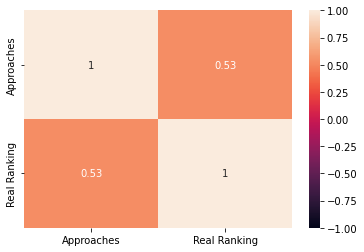

In [89]:
newmerged_df_19, real19, dfreal19 = realt(realt19,sorting19,df19,"Overall")
raw_19 = prediction(newmerged_df_19,sorting19,real19,"Overall")

corr19 = raw_19[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr19, vmin=-1, vmax=1, annot=True)
plt.show()

In [90]:
mse19 = mse(raw_19["Approaches"], raw_19["Estimated Ranking"])

Model with low test power

mse value: 6.93643509478151 

cohens d: -5.995280768083945e-15


In [91]:
replace_values19 = {1 : 18, 2 : 17, 3 : 16, 4 : 15 , 5 : 14, 6 : 13, 7 : 12, 8 : 11, 9 : 10, 10 : 9, 11 : 8, 12 : 7, 13 : 6, 14 : 5, 15 : 4, 16 : 3, 17 : 2, 18 : 1}                                                                                          
new_19 = raw_19.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19 = new_19[['Real Ranking', 'Estimated Ranking']].copy()
new19

,Real Ranking,Estimated Ranking
Galatasaray SK,1,4
Medipol Başakşehir FK,2,3
Beşiktaş JK,3,2
Trabzonspor,4,6
Yeni Malatyaspor,5,17
Fenerbahçe SK,6,1
Antalyaspor,7,14
Atiker Konyaspor,8,5
Alanyaspor,9,11
Kayserispor,10,9


In [92]:
new19.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.519092
Estimated Ranking,0.519092,1.000000


### FIFA 19 - Acceleration

In [93]:
df19_acc = dfmaker(teams19,"Club","Acceleration")
df19_acc

,Teams,Acceleration
12,Trabzonspor,69.392857
5,Galatasaray SK,68.866667
7,Medipol Başakşehir FK,67.500000
17,Atiker Konyaspor,66.814815
1,Beşiktaş JK,66.392857
3,Akhisar Belediyespor,66.192308
0,Antalyaspor,65.866667
6,Bursaspor,65.733333
4,Fenerbahçe SK,65.600000
2,Alanyaspor,64.133333


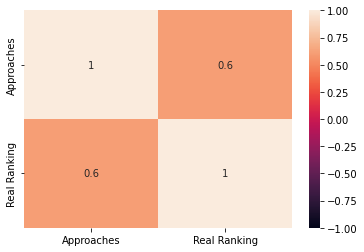

In [94]:
newmerged_df_19_acc, real19_acc, dfreal19_acc = realt(realt19,sorting19,df19_acc,"Acceleration")
raw_19_acc = prediction(newmerged_df_19_acc,sorting19,real19_acc,"Acceleration")

corr19_acc = raw_19_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr19_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [95]:
mse19_acc = mse(raw_19_acc["Approaches"], raw_19_acc["Estimated Ranking"])

Model with low test power

mse value: 4.70962563791526 

cohens d: -3.637931362204603e-16


In [96]:
new_19_acc = raw_19_acc.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19_acc = new_19_acc[['Real Ranking', 'Estimated Ranking']].copy()
new19_acc

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Medipol Başakşehir FK,2,3
Beşiktaş JK,3,5
Trabzonspor,4,1
Yeni Malatyaspor,5,16
Fenerbahçe SK,6,9
Antalyaspor,7,7
Atiker Konyaspor,8,4
Alanyaspor,9,10
Kayserispor,10,14


In [97]:
new19_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.574819
Estimated Ranking,0.574819,1.000000


### FIFA 19 - Finishing

In [98]:
df19_fns = dfmaker(teams19,"Club","Finishing")
df19_fns

,Teams,Finishing
4,Fenerbahçe SK,52.666667
5,Galatasaray SK,51.466667
1,Beşiktaş JK,50.785714
2,Alanyaspor,50.400000
3,Akhisar Belediyespor,49.961538
7,Medipol Başakşehir FK,48.821429
15,Göztepe SK,48.750000
12,Trabzonspor,48.357143
11,Sivasspor,47.925926
10,MKE Ankaragücü,47.793103


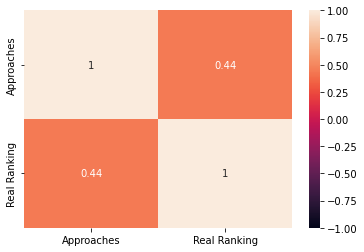

In [99]:
newmerged_df_19_fns, real19_fns, dfreal19_fns = realt(realt19,sorting19,df19_fns,"Finishing")
raw_19_fns = prediction(newmerged_df_19_fns,sorting19,real19_fns,"Finishing")

corr19_fns = raw_19_fns[["Approaches","Real Ranking"]].corr()
heatmap1_fns = sns.heatmap(corr19_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [100]:
mse19_fns = mse(raw_19_fns["Approaches"], raw_19_fns["Estimated Ranking"])

Model with low test power

mse value: 8.99035664468409 

cohens d: 1.1848728491703652e-15


In [101]:
new_19_fns = raw_19_fns.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19_fns = new_19_fns[['Real Ranking', 'Estimated Ranking']].copy()
new19_fns

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Medipol Başakşehir FK,2,6
Beşiktaş JK,3,3
Trabzonspor,4,8
Yeni Malatyaspor,5,17
Fenerbahçe SK,6,1
Antalyaspor,7,16
Atiker Konyaspor,8,11
Alanyaspor,9,4
Kayserispor,10,13


In [102]:
new19_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.397317
Estimated Ranking,0.397317,1.000000


### FIFA 19 - Dribbling

In [103]:
df19_drb = dfmaker(teams19,"Club","Dribbling")
df19_drb

,Teams,Dribbling
4,Fenerbahçe SK,64.400000
5,Galatasaray SK,63.200000
7,Medipol Başakşehir FK,61.357143
17,Atiker Konyaspor,61.000000
1,Beşiktaş JK,60.607143
12,Trabzonspor,60.500000
6,Bursaspor,60.400000
3,Akhisar Belediyespor,60.384615
10,MKE Ankaragücü,58.344828
2,Alanyaspor,58.266667


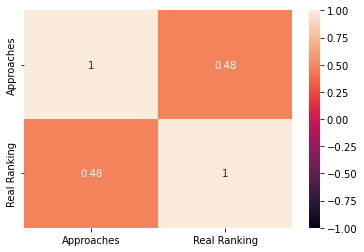

In [104]:
newmerged_df_19_drb, real19_drb, dfreal19_drb = realt(realt19,sorting19,df19_drb,"Dribbling")
raw_19_drb = prediction(newmerged_df_19_drb,sorting19,real19_drb,"Dribbling")

corr19_drb = raw_19_drb[["Approaches","Real Ranking"]].corr()
heatmap1_drb = sns.heatmap(corr19_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [105]:
mse19_drb = mse(raw_19_drb["Approaches"], raw_19_drb["Estimated Ranking"])

Model with low test power

mse value: 8.053854011003137 

cohens d: 9.736746478631112e-16


In [106]:
new_19_drb = raw_19_drb.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19_drb = new_19_drb[['Real Ranking', 'Estimated Ranking']].copy()
new19_drb

,Real Ranking,Estimated Ranking
Galatasaray SK,1,2
Medipol Başakşehir FK,2,3
Beşiktaş JK,3,5
Trabzonspor,4,6
Yeni Malatyaspor,5,17
Fenerbahçe SK,6,1
Antalyaspor,7,16
Atiker Konyaspor,8,4
Alanyaspor,9,10
Kayserispor,10,12


In [107]:
new19_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.484004
Estimated Ranking,0.484004,1.000000


### FIFA 19 - Strength

In [108]:
df19_str = dfmaker(teams19,"Club","Strength")
df19_str

,Teams,Strength
1,Beşiktaş JK,69.714286
9,Kayserispor,68.000000
10,MKE Ankaragücü,67.655172
17,Atiker Konyaspor,67.518519
3,Akhisar Belediyespor,67.500000
8,Kasimpaşa SK,67.130435
4,Fenerbahçe SK,66.966667
15,Göztepe SK,66.821429
6,Bursaspor,65.866667
0,Antalyaspor,65.466667


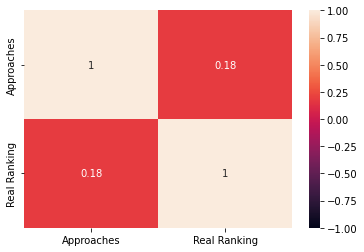

In [109]:
newmerged_df_19_str, real19_str, dfreal19_str = realt(realt19,sorting19,df19_str,"Strength")
raw_19_str = prediction(newmerged_df_19_str,sorting19,real19_str,"Strength")

corr19_str = raw_19_str[["Approaches","Real Ranking"]].corr()
heatmap1_str = sns.heatmap(corr19_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [110]:
mse19_str = mse(raw_19_str["Approaches"], raw_19_str["Estimated Ranking"])

Model with low test power

mse value: 18.392303568448952 

cohens d: -5.062468395436603e-16


In [111]:
new_19_str = raw_19_str.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19_str = new_19_str[['Real Ranking', 'Estimated Ranking']].copy()
new19_str

,Real Ranking,Estimated Ranking
Galatasaray SK,1,3
Medipol Başakşehir FK,2,2
Beşiktaş JK,3,18
Trabzonspor,4,6
Yeni Malatyaspor,5,5
Fenerbahçe SK,6,12
Antalyaspor,7,9
Atiker Konyaspor,8,15
Alanyaspor,9,7
Kayserispor,10,17


In [112]:
new19_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.223942
Estimated Ranking,0.223942,1.000000


### FIFA 19 - Stamina

In [113]:
df19_stm = dfmaker(teams19,"Club","Stamina")
df19_stm

,Teams,Stamina
4,Fenerbahçe SK,69.366667
12,Trabzonspor,68.000000
3,Akhisar Belediyespor,67.307692
17,Atiker Konyaspor,66.296296
0,Antalyaspor,64.466667
5,Galatasaray SK,64.100000
8,Kasimpaşa SK,63.652174
9,Kayserispor,63.520000
7,Medipol Başakşehir FK,63.464286
1,Beşiktaş JK,62.428571


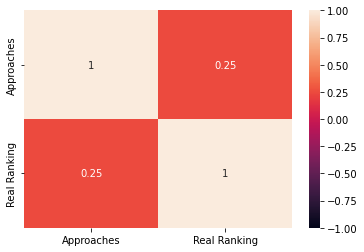

In [114]:
newmerged_df_19_stm, real19_stm, dfreal19_stm = realt(realt19,sorting19,df19_stm,"Stamina")
raw_19_stm = prediction(newmerged_df_19_stm,sorting19,real19_stm,"Stamina")

corr19_stm = raw_19_stm[["Approaches","Real Ranking"]].corr()
heatmap1_stm = sns.heatmap(corr19_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [115]:
mse19_stm = mse(raw_19_stm["Approaches"], raw_19_stm["Estimated Ranking"])

Model with low test power

mse value: 15.40328412343923 

cohens d: 1.2069583443042824e-15


In [116]:
new_19_stm = raw_19_stm.replace(replace_values19).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new19_stm = new_19_stm[['Real Ranking', 'Estimated Ranking']].copy()
new19_stm

,Real Ranking,Estimated Ranking
Galatasaray SK,1,6
Medipol Başakşehir FK,2,9
Beşiktaş JK,3,10
Trabzonspor,4,2
Yeni Malatyaspor,5,18
Fenerbahçe SK,6,1
Antalyaspor,7,5
Atiker Konyaspor,8,4
Alanyaspor,9,11
Kayserispor,10,8


In [117]:
new19_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.298246
Estimated Ranking,0.298246,1.000000


# FIFA20

### FIFA 20 - Overall

Ingesting player attributes data for FIFA 2020

In [118]:
data20 = pd.read_csv("players_20.csv")
data20 = data20.sort_values(by="overall", ascending = False)
data20

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, CF, ST",94,94,95500000.0,560000.0,32,...,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",93,93,58500000.0,410000.0,34,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/20_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,105500000.0,290000.0,27,...,47+6,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png
3,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,"LW, CF",91,91,90000000.0,470000.0,28,...,49+6,49+6,49+6,61+6,18+6,https://cdn.sofifa.net/players/183/277/20_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,90000000.0,370000.0,28,...,67+3,67+3,67+3,73+3,21+3,https://cdn.sofifa.net/players/192/985/20_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,246694,https://sofifa.com/player/246694/sean-callan/2...,S. Callan,Sean Callan,"CB, RB",48,61,50000.0,500.0,19,...,47+2,47+2,47+2,45+2,14+2,https://cdn.sofifa.net/players/246/694/20_120.png,https://cdn.sofifa.net/teams/306/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
18456,247002,https://sofifa.com/player/247002/jack-ryan/200002,J. Ryan,Jack Ryan,CM,48,60,50000.0,500.0,19,...,45+2,45+2,45+2,45+2,14+2,https://cdn.sofifa.net/players/247/002/20_120.png,https://cdn.sofifa.net/teams/111132/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
18457,247100,https://sofifa.com/player/247100/elliott-sarto...,E. Sartorius,Elliott Sartorius,ST,48,67,60000.0,500.0,16,...,27+2,27+2,27+2,33+2,15+2,https://cdn.sofifa.net/players/247/100/20_120.png,https://cdn.sofifa.net/teams/149/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
18458,247201,https://sofifa.com/player/247201/luke-singh/20...,L. Singh,Luke Singh,"CB, LB",48,70,60000.0,500.0,17,...,47+2,47+2,47+2,44+2,14+2,https://cdn.sofifa.net/players/247/201/20_120.png,https://cdn.sofifa.net/teams/269/60.png,https://cdn.sofifa.net/flags/dk.png,NaN,https://cdn.sofifa.net/flags/ca.png


In [119]:
data20 = data20[["short_name", "age", "overall","movement_acceleration", "attacking_finishing", "dribbling", "power_strength","power_stamina", "potential", "club_name", "height_cm", "value_eur"]]
antalya20 = data20[data20["club_name"] == "Antalyaspor"]
besiktas20 = data20[data20["club_name"] == "Beşiktaş JK"]
alanya20 = data20[data20["club_name"] == "Aytemiz Alanyaspor"]
fenerbahce20 = data20[data20["club_name"] == "Fenerbahçe SK"]
galatasaray20 = data20[data20["club_name"] == "Galatasaray SK"]
gaziantep20 = data20[data20["club_name"] == "Gazişehir Gaziantep F.K."]
basaksehir20 = data20[data20["club_name"] == "İstanbul Başakşehir FK"]
kasimpasa20 = data20[data20["club_name"] == "Kasimpaşa SK"]
kayseri20 = data20[data20["club_name"] == "Yukatel Kayserispor"]
konya20 = data20[data20["club_name"] == "İttifak Holding Konyaspor"]
ankaragucu20 = data20[data20["club_name"] == "MKE Ankaragücü"]
sivas20 = data20[data20["club_name"] == "Demir Grup Sivasspor"]
trabzon20 = data20[data20["club_name"] == "Trabzonspor"]
rize20 = data20[data20["club_name"] == "Çaykur Rizespor"]
denizli20 = data20[data20["club_name"] == "Denizlispor"]
genclerbirligi20 = data20[data20["club_name"] == "Gençlerbirliği SK"]
goztepe20 = data20[data20["club_name"] == "Göztepe SK"]
malatya20 = data20[data20["club_name"] == "Yeni Malatyaspor"]
data20

,short_name,age,overall,movement_acceleration,attacking_finishing,dribbling,power_strength,power_stamina,potential,club_name,height_cm,value_eur
0,L. Messi,32,94,91,95,96.0,68,75,94,FC Barcelona,170,95500000.0
1,Cristiano Ronaldo,34,93,89,94,89.0,78,85,93,Juventus,187,58500000.0
2,Neymar Jr,27,92,94,87,95.0,49,81,92,Paris Saint-Germain,175,105500000.0
3,E. Hazard,28,91,94,84,94.0,63,84,91,Real Madrid CF,175,90000000.0
4,K. De Bruyne,28,91,77,82,86.0,74,89,91,Manchester City,181,90000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18455,S. Callan,19,48,59,23,30.0,52,58,61,Shamrock Rovers,182,50000.0
18456,J. Ryan,19,48,62,31,47.0,54,57,60,UCD AFC,178,50000.0
18457,E. Sartorius,16,48,70,53,49.0,34,41,67,Lincoln City,174,60000.0
18458,L. Singh,17,48,61,16,31.0,58,39,70,Brøndby IF,184,60000.0


In [120]:
teams20 = [antalya20, besiktas20, alanya20, fenerbahce20, galatasaray20, gaziantep20, 
           basaksehir20, kasimpasa20, kayseri20, konya20, ankaragucu20, sivas20,
           trabzon20, rize20, denizli20, genclerbirligi20, goztepe20, malatya20 ]

In [121]:
df20 = dfmaker(teams20,"club_name","overall")
df20

,Teams,overall
6,İstanbul Başakşehir FK,73.466667
4,Galatasaray SK,72.433333
1,Beşiktaş JK,72.366667
3,Fenerbahçe SK,72.266667
9,İttifak Holding Konyaspor,68.814815
2,Aytemiz Alanyaspor,68.517241
12,Trabzonspor,68.500000
13,Çaykur Rizespor,67.608696
5,Gazişehir Gaziantep F.K.,67.100000
15,Gençlerbirliği SK,66.791667


In [122]:
sorting20 = []
for i in range(18):
    sorting20.append(i+1)
    i+1
sorting20.sort(reverse = True)
sorting20

[18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [123]:
realt20 = ["İstanbul Başakşehir FK", "Trabzonspor", "Beşiktaş JK", "Demir Grup Sivasspor", "Aytemiz Alanyaspor", 
           "Galatasaray SK", "Fenerbahçe SK", "Gazişehir Gaziantep F.K.", "Antalyaspor", "Kasimpaşa SK", "Göztepe SK",
          "Gençlerbirliği SK", "İttifak Holding Konyaspor", "Denizlispor", "Çaykur Rizespor", "Yeni Malatyaspor", 
           "Yukatel Kayserispor", "MKE Ankaragücü"]

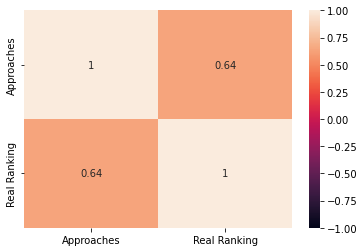

In [124]:
newmerged_df_20, real20, dfreal20 = realt(realt20,sorting20,df20,"overall")
raw_20 = prediction(newmerged_df_20,sorting20,real20,"overall")

corr20 = raw_20[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20, vmin=-1, vmax=1, annot=True)
plt.show()

In [125]:
mse20 = mse(raw_20["Approaches"], raw_20["Estimated Ranking"])

Model with low test power

mse value: 6.8166747939190095 

cohens d: -7.257259429817991e-15


In [126]:
replace_values20 = {1 : 18, 2 : 17, 3 : 16, 4 : 15 , 5 : 14, 6 : 13, 7 : 12, 8 : 11, 9 : 10, 10 : 9, 11 : 8, 12 : 7, 13 : 6, 14 : 5, 15 : 4, 16 : 3, 17 : 2, 18 : 1}                                                                                          
new_20 = raw_20.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20 = new_20[['Real Ranking', 'Estimated Ranking']].copy()
new20

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,1
Trabzonspor,2,7
Beşiktaş JK,3,3
Demir Grup Sivasspor,4,15
Aytemiz Alanyaspor,5,6
Galatasaray SK,6,2
Fenerbahçe SK,7,4
Gazişehir Gaziantep F.K.,8,9
Antalyaspor,9,17
Kasimpaşa SK,10,13


In [127]:
new20.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.578947
Estimated Ranking,0.578947,1.000000


### FIFA 20 - Acceleration

In [128]:
df20_acc = dfmaker(teams20,"club_name","movement_acceleration")
df20_acc

,Teams,movement_acceleration
6,İstanbul Başakşehir FK,69.600000
5,Gazişehir Gaziantep F.K.,69.100000
1,Beşiktaş JK,68.600000
14,Denizlispor,67.434783
4,Galatasaray SK,67.400000
12,Trabzonspor,66.833333
0,Antalyaspor,66.571429
3,Fenerbahçe SK,64.266667
13,Çaykur Rizespor,64.043478
7,Kasimpaşa SK,63.777778


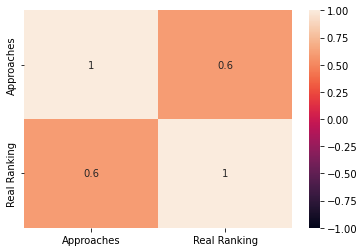

In [129]:
newmerged_df_20_acc, real20_acc, dfreal20_acc = realt(realt20,sorting20,df20_acc,"movement_acceleration")
raw_20_acc = prediction(newmerged_df_20_acc,sorting20,real20_acc,"movement_acceleration")

corr20_acc = raw_20_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [130]:
mse20_acc = mse(raw_20_acc["Approaches"], raw_20_acc["Estimated Ranking"])

Model with low test power

mse value: 4.754821926896217 

cohens d: 3.4395701495188776e-15


In [131]:
new_20_acc = raw_20_acc.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20_acc = new_20_acc[['Real Ranking', 'Estimated Ranking']].copy()
new20_acc

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,1
Trabzonspor,2,6
Beşiktaş JK,3,3
Demir Grup Sivasspor,4,15
Aytemiz Alanyaspor,5,13
Galatasaray SK,6,5
Fenerbahçe SK,7,8
Gazişehir Gaziantep F.K.,8,2
Antalyaspor,9,7
Kasimpaşa SK,10,10


In [132]:
new20_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.562436
Estimated Ranking,0.562436,1.000000


### FIFA 20 - Finishing

In [133]:
df20_fns = dfmaker(teams20,"club_name","attacking_finishing")
df20_fns

,Teams,attacking_finishing
6,İstanbul Başakşehir FK,54.333333
1,Beşiktaş JK,53.133333
4,Galatasaray SK,51.166667
3,Fenerbahçe SK,50.166667
2,Aytemiz Alanyaspor,49.172414
12,Trabzonspor,48.166667
15,Gençlerbirliği SK,47.541667
0,Antalyaspor,47.000000
14,Denizlispor,46.913043
5,Gazişehir Gaziantep F.K.,46.033333


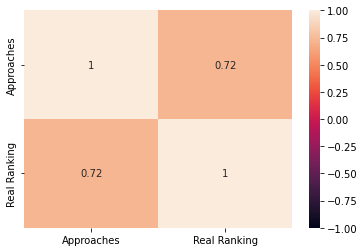

In [134]:
newmerged_df_20_fns, real20_fns, dfreal20_fns = realt(realt20,sorting20,df20_fns,"attacking_finishing")
raw_20_fns = prediction(newmerged_df_20_fns,sorting20,real20_fns,"attacking_finishing")

corr20_fns = raw_20_fns[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [135]:
mse20_fns = mse(raw_20_fns["Approaches"], raw_20_fns["Estimated Ranking"])

Model with low test power

mse value: 3.373155446427903 

cohens d: 1.0746561423900919e-15


In [136]:
new_20_fns = raw_20_fns.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20_fns = new_20_fns[['Real Ranking', 'Estimated Ranking']].copy()
new20_fns

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,1
Trabzonspor,2,6
Beşiktaş JK,3,2
Demir Grup Sivasspor,4,11
Aytemiz Alanyaspor,5,5
Galatasaray SK,6,3
Fenerbahçe SK,7,4
Gazişehir Gaziantep F.K.,8,10
Antalyaspor,9,8
Kasimpaşa SK,10,18


In [137]:
new20_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.737874
Estimated Ranking,0.737874,1.000000


### FIFA 20 - Dribbling

In [138]:
df20_drb = dfmaker(teams20,"club_name","dribbling")
df20_drb

,Teams,dribbling
6,İstanbul Başakşehir FK,70.142857
1,Beşiktaş JK,70.074074
3,Fenerbahçe SK,69.500000
4,Galatasaray SK,68.888889
12,Trabzonspor,65.666667
2,Aytemiz Alanyaspor,65.538462
14,Denizlispor,64.800000
5,Gazişehir Gaziantep F.K.,64.666667
13,Çaykur Rizespor,64.285714
11,Demir Grup Sivasspor,64.043478


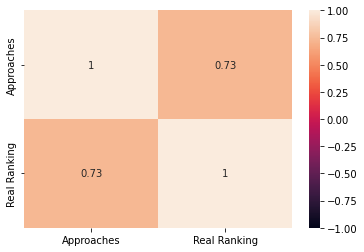

In [139]:
newmerged_df_20_drb, real20_drb, dfreal20_drb = realt(realt20,sorting20,df20_drb,"dribbling")
raw_20_drb = prediction(newmerged_df_20_drb,sorting20,real20_drb,"dribbling")

corr20_drb = raw_20_drb[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [140]:
mse20_drb = mse(raw_20_drb["Approaches"], raw_20_drb["Estimated Ranking"])

Model with low test power

mse value: 3.829070603685412 

cohens d: -3.6311443728824166e-15


In [141]:
new_20_drb = raw_20_drb.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20_drb = new_20_drb[['Real Ranking', 'Estimated Ranking']].copy()
new20_drb

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,1
Trabzonspor,2,5
Beşiktaş JK,3,2
Demir Grup Sivasspor,4,10
Aytemiz Alanyaspor,5,6
Galatasaray SK,6,4
Fenerbahçe SK,7,3
Gazişehir Gaziantep F.K.,8,8
Antalyaspor,9,16
Kasimpaşa SK,10,15


In [142]:
new20_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.729618
Estimated Ranking,0.729618,1.000000


### FIFA 20 - Strength

In [143]:
df20_str = dfmaker(teams20,"club_name","power_strength")
df20_str

,Teams,power_strength
15,Gençlerbirliği SK,68.916667
3,Fenerbahçe SK,68.400000
9,İttifak Holding Konyaspor,67.888889
2,Aytemiz Alanyaspor,66.931034
1,Beşiktaş JK,66.666667
17,Yeni Malatyaspor,66.357143
16,Göztepe SK,66.321429
7,Kasimpaşa SK,66.222222
6,İstanbul Başakşehir FK,66.100000
10,MKE Ankaragücü,65.952381


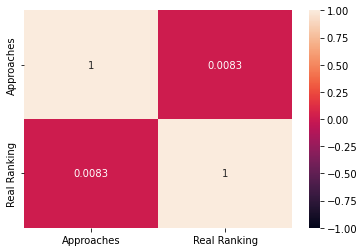

In [144]:
newmerged_df_20_str, real20_str, dfreal20_str = realt(realt20,sorting20,df20_str,"power_strength")
raw_20_str = prediction(newmerged_df_20_str,sorting20,real20_str,"power_strength")

corr20_str = raw_20_str[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [145]:
mse20_str = mse(raw_20_str["Approaches"], raw_20_str["Estimated Ranking"])

Model with low test power

mse value: 26.483378031519333 

cohens d: 0.0


In [146]:
new_20_str = raw_20_str.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20_str = new_20_str[['Real Ranking', 'Estimated Ranking']].copy()
new20_str

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,9
Trabzonspor,2,11
Beşiktaş JK,3,5
Demir Grup Sivasspor,4,17
Aytemiz Alanyaspor,5,4
Galatasaray SK,6,12
Fenerbahçe SK,7,2
Gazişehir Gaziantep F.K.,8,14
Antalyaspor,9,18
Kasimpaşa SK,10,8


In [147]:
new20_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.050568
Estimated Ranking,0.050568,1.000000


### FIFA 20 - Stamina

In [148]:
df20_stm = dfmaker(teams20,"club_name","power_stamina")
df20_stm

,Teams,power_stamina
6,İstanbul Başakşehir FK,69.566667
7,Kasimpaşa SK,65.962963
4,Galatasaray SK,65.600000
9,İttifak Holding Konyaspor,65.148148
3,Fenerbahçe SK,64.500000
13,Çaykur Rizespor,64.173913
2,Aytemiz Alanyaspor,63.862069
14,Denizlispor,63.826087
12,Trabzonspor,63.633333
5,Gazişehir Gaziantep F.K.,63.533333


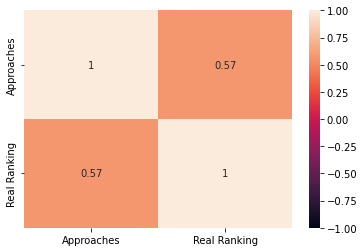

In [149]:
newmerged_df_20_stm, real20_stm, dfreal20_stm = realt(realt20,sorting20,df20_stm,"power_stamina")
raw_20_stm = prediction(newmerged_df_20_stm,sorting20,real20_stm,"power_stamina")

corr20_stm = raw_20_stm[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr20_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [150]:
mse20_stm = mse(raw_20_stm["Approaches"], raw_20_stm["Estimated Ranking"])

Model with low test power

mse value: 6.290905434317846 

cohens d: 3.6198365118256615e-15


In [151]:
new_20_stm = raw_20_stm.replace(replace_values20).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new20_stm = new_20_stm[['Real Ranking', 'Estimated Ranking']].copy()
new20_stm

,Real Ranking,Estimated Ranking
İstanbul Başakşehir FK,1,1
Trabzonspor,2,9
Beşiktaş JK,3,11
Demir Grup Sivasspor,4,14
Aytemiz Alanyaspor,5,7
Galatasaray SK,6,3
Fenerbahçe SK,7,5
Gazişehir Gaziantep F.K.,8,10
Antalyaspor,9,13
Kasimpaşa SK,10,2


In [152]:
new20_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.455108
Estimated Ranking,0.455108,1.000000


# FIFA 21

### FIFA 21 - Overall

Ingesting player attributes data for FIFA 2021

In [153]:
data21 = pd.read_csv("players_21.csv")
data21 = data21.sort_values(by="overall", ascending = False)
data21

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,252757,https://sofifa.com/player/252757/ronan-mckinle...,R. McKinley,Ronan McKinley,CM,47,65,120000.0,500.0,18,...,45+2,45+2,45+2,46+2,14+2,https://cdn.sofifa.net/players/252/757/21_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
18930,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,CB,47,51,60000.0,1000.0,20,...,47+2,47+2,47+2,44+2,16+2,https://cdn.sofifa.net/players/250/989/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18929,247223,https://sofifa.com/player/247223/ao-xia/210002,Xia Ao,夏奥,CB,47,55,100000.0,1000.0,21,...,47+2,47+2,47+2,46+2,14+2,https://cdn.sofifa.net/players/247/223/21_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18928,243790,https://sofifa.com/player/243790/zhenao-wang/2...,Wang Zhen'ao,王振澳,RW,47,57,100000.0,2000.0,20,...,35+2,35+2,35+2,39+2,14+2,https://cdn.sofifa.net/players/243/790/21_120.png,https://cdn.sofifa.net/teams/112378/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png


In [154]:
data21 = data21[["short_name", "age", "overall","movement_acceleration", "attacking_finishing", "dribbling", "power_strength","power_stamina", "potential", "club_name", "height_cm", "value_eur"]]
antalya21 = data21[data21["club_name"] == "Antalyaspor"]
besiktas21 = data21[data21["club_name"] == "Beşiktaş JK"]
alanya21 = data21[data21["club_name"] == "Aytemiz Alanyaspor"]
karagumruk21 = data21[data21["club_name"] == "Fatih Karagümrük S.K."]
fenerbahce21 = data21[data21["club_name"] == "Fenerbahçe SK"]
galatasaray21 = data21[data21["club_name"] == "Galatasaray SK"]
gaziantep21 = data21[data21["club_name"] == "Gazişehir Gaziantep F.K."]
hatay21 = data21[data21["club_name"] == "Atakaş Hatayspor"]
basaksehir21 = data21[data21["club_name"] == "İstanbul Başakşehir FK"]
kasimpasa21 = data21[data21["club_name"] == "Kasimpaşa SK"]
kayseri21 = data21[data21["club_name"] == "Yukatel Kayserispor"]
konya21 = data21[data21["club_name"] == "İttifak Holding Konyaspor"]
ankaragucu21 = data21[data21["club_name"] == "MKE Ankaragücü"]
sivas21 = data21[data21["club_name"] == "Demir Grup Sivasspor"]
trabzon21 = data21[data21["club_name"] == "Trabzonspor"]
erzurum21 = data21[data21["club_name"] == "BB Erzurumspor"]
rize21 = data21[data21["club_name"] == "Çaykur Rizespor"]
denizli21 = data21[data21["club_name"] == "Denizlispor"]
genclerbirligi21 = data21[data21["club_name"] == "Gençlerbirliği SK"]
goztepe21 = data21[data21["club_name"] == "Göztepe SK"]
malatya21 = data21[data21["club_name"] == "Yeni Malatyaspor"]
data21

,short_name,age,overall,movement_acceleration,attacking_finishing,dribbling,power_strength,power_stamina,potential,club_name,height_cm,value_eur
0,L. Messi,33,93,91,95,95.0,69,72,93,FC Barcelona,170,103500000.0
1,Cristiano Ronaldo,35,92,87,95,89.0,78,84,92,Juventus,187,63000000.0
2,R. Lewandowski,31,91,77,94,85.0,86,76,91,FC Bayern München,184,111000000.0
3,Neymar Jr,28,91,94,87,94.0,50,81,91,Paris Saint-Germain,175,132000000.0
4,K. De Bruyne,29,91,77,82,88.0,74,89,91,Manchester City,181,129000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18932,R. McKinley,18,47,59,34,46.0,54,50,65,Derry City,179,120000.0
18930,Wang Zhenghao,20,47,54,20,36.0,55,58,51,Tianjin Jinmen Tiger FC,185,60000.0
18929,Xia Ao,21,47,68,26,38.0,50,54,55,Wuhan FC,178,100000.0
18928,Wang Zhen'ao,20,47,62,52,49.0,48,46,57,Dalian Professional Football Club,175,100000.0


In [155]:
teams21 = [antalya21, besiktas21, alanya21, karagumruk21, fenerbahce21, galatasaray21, 
           gaziantep21, hatay21, basaksehir21, kasimpasa21, kayseri21, konya21,
           ankaragucu21, sivas21, trabzon21, erzurum21, rize21, denizli21, genclerbirligi21, goztepe21, malatya21]

In [156]:
df21 = dfmaker(teams21,"club_name","overall")
df21

,Teams,overall
5,Galatasaray SK,72.200000
8,İstanbul Başakşehir FK,71.433333
1,Beşiktaş JK,70.571429
4,Fenerbahçe SK,70.366667
13,Demir Grup Sivasspor,69.407407
14,Trabzonspor,68.827586
11,İttifak Holding Konyaspor,68.230769
0,Antalyaspor,67.448276
2,Aytemiz Alanyaspor,67.080000
18,Gençlerbirliği SK,67.080000


In [157]:
sorting21 = []
for i in range(21):
    sorting21.append(i+1)
    i+1
sorting21.sort(reverse = True)
sorting21

[21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [158]:
realt21 = ["Beşiktaş JK", "Galatasaray SK", "Fenerbahçe SK", "Trabzonspor", "Demir Grup Sivasspor", 
           "Atakaş Hatayspor", "Aytemiz Alanyaspor", "Fatih Karagümrük S.K.", "Gazişehir Gaziantep F.K.",
           "Göztepe SK", "İttifak Holding Konyaspor","İstanbul Başakşehir FK", "Çaykur Rizespor", "Kasimpaşa SK",
           "Yeni Malatyaspor", "Antalyaspor",  "Yukatel Kayserispor", "BB Erzurumspor", "MKE Ankaragücü",
           "Gençlerbirliği SK", "Denizlispor"]

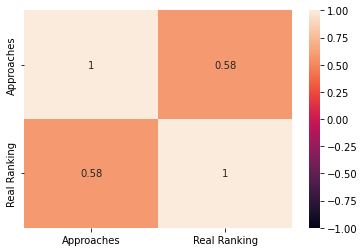

In [159]:
newmerged_df_21, real21, dfreal21 = realt(realt21,sorting21,df21,"overall")
raw_21 = prediction(newmerged_df_21,sorting21,real21,"overall")

corr21 = raw_21[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21, vmin=-1, vmax=1, annot=True)
plt.show()

In [160]:
mse21 = mse(raw_21["Approaches"], raw_21["Estimated Ranking"])

Model with low test power

mse value: 7.594807454646787 

cohens d: -9.576506940402768e-15


In [161]:
replace_values21 = {1 : 21, 2 : 20, 3 : 19, 4 : 18 , 5 : 17, 6 : 16, 7 : 15, 8 : 14, 9 : 13, 10 : 12, 11 : 11, 12 : 10, 13 : 9, 14 : 8, 15 : 7, 16 : 6, 17 : 5, 18 : 4, 19 : 3, 20 : 2, 21 : 1}                                                                                          
new_21 = raw_21.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21 = new_21[['Real Ranking', 'Estimated Ranking']].copy()
new21

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,3
Galatasaray SK,2,1
Fenerbahçe SK,3,4
Trabzonspor,4,6
Demir Grup Sivasspor,5,5
Atakaş Hatayspor,6,21
Aytemiz Alanyaspor,7,9
Fatih Karagümrük S.K.,8,17
Gazişehir Gaziantep F.K.,9,12
Göztepe SK,10,15


In [162]:
new21.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.523377
Estimated Ranking,0.523377,1.000000


### FIFA 21 - Acceleration

In [163]:
df21_acc = dfmaker(teams21,"club_name","movement_acceleration")
df21_acc

,Teams,movement_acceleration
5,Galatasaray SK,71.700000
14,Trabzonspor,69.655172
1,Beşiktaş JK,68.571429
13,Demir Grup Sivasspor,66.666667
4,Fenerbahçe SK,66.566667
8,İstanbul Başakşehir FK,66.266667
6,Gazişehir Gaziantep F.K.,66.192308
0,Antalyaspor,65.862069
20,Yeni Malatyaspor,64.464286
16,Çaykur Rizespor,64.366667


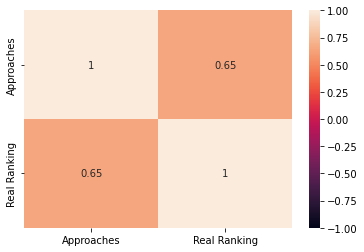

In [164]:
newmerged_df_21_acc, real21_acc, dfreal21_acc = realt(realt21,sorting21,df21_acc,"movement_acceleration")
raw_21_acc = prediction(newmerged_df_21_acc,sorting21,real21_acc,"movement_acceleration")

corr21_acc = raw_21_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [165]:
mse21_acc = mse(raw_21_acc["Approaches"], raw_21_acc["Estimated Ranking"])

Model with low test power

mse value: 7.30887100882013 

cohens d: -3.5043202782492203e-15


In [166]:
new_21_acc = raw_21_acc.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21_acc = new_21_acc[['Real Ranking', 'Estimated Ranking']].copy()
new21_acc

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,3
Galatasaray SK,2,1
Fenerbahçe SK,3,5
Trabzonspor,4,2
Demir Grup Sivasspor,5,4
Atakaş Hatayspor,6,12
Aytemiz Alanyaspor,7,16
Fatih Karagümrük S.K.,8,19
Gazişehir Gaziantep F.K.,9,7
Göztepe SK,10,20


In [167]:
new21_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.611688
Estimated Ranking,0.611688,1.000000


### FIFA 21 -  Finishing

In [168]:
df21_fns = dfmaker(teams21,"club_name","attacking_finishing")
df21_fns

,Teams,attacking_finishing
5,Galatasaray SK,53.300000
1,Beşiktaş JK,51.392857
4,Fenerbahçe SK,50.400000
2,Aytemiz Alanyaspor,49.960000
8,İstanbul Başakşehir FK,49.900000
0,Antalyaspor,49.862069
13,Demir Grup Sivasspor,49.481481
14,Trabzonspor,48.620690
18,Gençlerbirliği SK,48.280000
7,Atakaş Hatayspor,47.833333


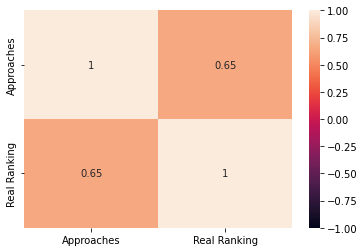

In [169]:
newmerged_df_21_fns, real21_fns, dfreal21_fns = realt(realt21,sorting21,df21_fns,"attacking_finishing")
raw_21_fns = prediction(newmerged_df_21_fns,sorting21,real21_fns,"attacking_finishing")

corr21_fns = raw_21_fns[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [170]:
mse21_fns = mse(raw_21_fns["Approaches"], raw_21_fns["Estimated Ranking"])

Model with low test power

mse value: 5.014791341127549 

cohens d: -3.0218609119517574e-15


In [171]:
new_21_fns = raw_21_fns.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21_fns = new_21_fns[['Real Ranking', 'Estimated Ranking']].copy()
new21_fns

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,2
Galatasaray SK,2,1
Fenerbahçe SK,3,3
Trabzonspor,4,8
Demir Grup Sivasspor,5,7
Atakaş Hatayspor,6,10
Aytemiz Alanyaspor,7,4
Fatih Karagümrük S.K.,8,18
Gazişehir Gaziantep F.K.,9,16
Göztepe SK,10,13


In [172]:
new21_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.00000,0.67013
Estimated Ranking,0.67013,1.00000


### FIFA 21 - Dribbling

In [173]:
df21_drb = dfmaker(teams21,"club_name","dribbling")
df21_drb

,Teams,dribbling
5,Galatasaray SK,69.666667
8,İstanbul Başakşehir FK,67.851852
13,Demir Grup Sivasspor,67.500000
4,Fenerbahçe SK,67.142857
14,Trabzonspor,66.807692
1,Beşiktaş JK,66.653846
0,Antalyaspor,65.807692
6,Gazişehir Gaziantep F.K.,64.652174
18,Gençlerbirliği SK,64.227273
2,Aytemiz Alanyaspor,63.869565


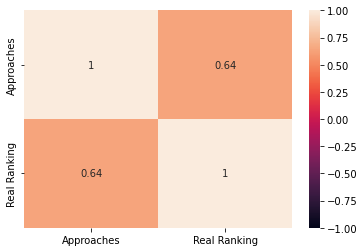

In [174]:
newmerged_df_21_drb, real21_drb, dfreal21_drb = realt(realt21,sorting21,df21_drb,"dribbling")
raw_21_drb = prediction(newmerged_df_21_drb,sorting21,real21_drb,"dribbling")

corr21_drb = raw_21_drb[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [175]:
mse21_drb = mse(raw_21_drb["Approaches"], raw_21_drb["Estimated Ranking"])

Model with low test power

mse value: 5.745776508925414 

cohens d: 1.2139337770462864e-14


In [176]:
new_21_drb = raw_21_drb.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21_drb = new_21_drb[['Real Ranking', 'Estimated Ranking']].copy()
new21_drb

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,6
Galatasaray SK,2,1
Fenerbahçe SK,3,4
Trabzonspor,4,5
Demir Grup Sivasspor,5,3
Atakaş Hatayspor,6,16
Aytemiz Alanyaspor,7,10
Fatih Karagümrük S.K.,8,18
Gazişehir Gaziantep F.K.,9,8
Göztepe SK,10,12


In [177]:
new21_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.620779
Estimated Ranking,0.620779,1.000000


### FIFA 21 - Strength

In [178]:
df21_str = dfmaker(teams21,"club_name","power_strength")
df21_str

,Teams,power_strength
18,Gençlerbirliği SK,70.120000
1,Beşiktaş JK,68.964286
8,İstanbul Başakşehir FK,67.666667
11,İttifak Holding Konyaspor,67.230769
13,Demir Grup Sivasspor,67.111111
5,Galatasaray SK,66.500000
4,Fenerbahçe SK,66.066667
17,Denizlispor,65.888889
14,Trabzonspor,64.931034
15,BB Erzurumspor,64.724138


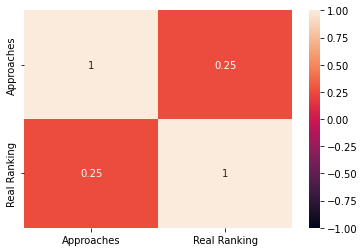

In [179]:
newmerged_df_21_str, real21_str, dfreal21_str = realt(realt21,sorting21,df21_str,"power_strength")
raw_21_str = prediction(newmerged_df_21_str,sorting21,real21_str,"power_strength")

corr21_str = raw_21_str[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [180]:
mse21_str = mse(raw_21_str["Approaches"], raw_21_str["Estimated Ranking"])

Model with low test power

mse value: 20.82803635213373 

cohens d: 0.0


In [181]:
new_21_str = raw_21_str.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21_str = new_21_str[['Real Ranking', 'Estimated Ranking']].copy()
new21_str

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,2
Galatasaray SK,2,6
Fenerbahçe SK,3,7
Trabzonspor,4,9
Demir Grup Sivasspor,5,5
Atakaş Hatayspor,6,16
Aytemiz Alanyaspor,7,14
Fatih Karagümrük S.K.,8,18
Gazişehir Gaziantep F.K.,9,13
Göztepe SK,10,17


In [182]:
new21_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.248052
Estimated Ranking,0.248052,1.000000


### FIFA 21 - Stamina

In [183]:
df21_stm = dfmaker(teams21,"club_name","power_stamina")
df21_stm

,Teams,power_stamina
8,İstanbul Başakşehir FK,67.366667
5,Galatasaray SK,66.000000
4,Fenerbahçe SK,65.533333
11,İttifak Holding Konyaspor,64.076923
13,Demir Grup Sivasspor,64.037037
18,Gençlerbirliği SK,63.800000
14,Trabzonspor,63.172414
16,Çaykur Rizespor,63.066667
2,Aytemiz Alanyaspor,62.840000
1,Beşiktaş JK,62.571429


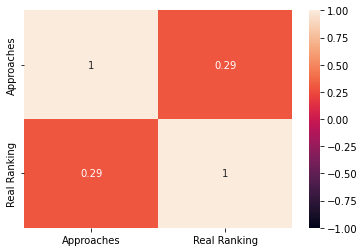

In [184]:
newmerged_df_21_stm, real21_stm, dfreal21_stm = realt(realt21,sorting21,df21_stm,"power_stamina")
raw_21_stm = prediction(newmerged_df_21_stm,sorting21,real21_stm,"power_stamina")

corr21_stm = raw_21_stm[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr21_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [185]:
mse21_stm = mse(raw_21_stm["Approaches"], raw_21_stm["Estimated Ranking"])

Model with low test power

mse value: 18.551469591986734 

cohens d: -3.142257279217172e-16


In [186]:
new_21_stm = raw_21_stm.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new21_stm = new_21_stm[['Real Ranking', 'Estimated Ranking']].copy()
new21_stm

,Real Ranking,Estimated Ranking
Beşiktaş JK,1,10
Galatasaray SK,2,2
Fenerbahçe SK,3,3
Trabzonspor,4,7
Demir Grup Sivasspor,5,5
Atakaş Hatayspor,6,20
Aytemiz Alanyaspor,7,9
Fatih Karagümrük S.K.,8,21
Gazişehir Gaziantep F.K.,9,14
Göztepe SK,10,16


In [187]:
new21_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.309091
Estimated Ranking,0.309091,1.000000


# FIFA 22

### FIFA 22 - Overall

Ingesting player attributes data for FIFA 2022

In [188]:
data22 = pd.read_csv("players_fifa22.csv")
data22 = data22.sort_values(by="Overall", ascending = False)
data22

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,261939,Chen Zhengfeng,Zhengfeng Chen,20,176,62,https://cdn.sofifa.com/players/261/939/22_60.png,China PR,48,52,...,48,50,48,49,50,49,49,49,49,15
19232,255553,Kwon Seong Yoon,Seong Yoon Kwon,20,176,69,https://cdn.sofifa.com/players/255/553/22_60.png,Korea Republic,48,61,...,50,45,50,41,38,41,39,35,39,12
19231,259649,E. Singh,Engson Singh,18,169,62,https://cdn.sofifa.com/players/259/649/22_60.png,India,48,65,...,49,48,49,44,43,44,43,39,43,14
19230,261424,N. Rabha,Nabin Rabha,24,176,66,https://cdn.sofifa.com/players/261/424/22_60.png,India,48,52,...,45,40,45,47,43,47,48,47,48,19


In [189]:
data22 = data22[["Name", "Age", "Overall","Acceleration","Finishing","Dribbling","Strength","Stamina", "Club", "Height", "ValueEUR"]]
antalya22 = data22[data22["Club"] == "Antalyaspor"]
adanademir22 = data22[data22["Club"] == "Adana Demirspor"]
besiktas22 = data22[data22["Club"] == "Beşiktaş JK"]
alanya22 = data22[data22["Club"] == "Aytemiz Alanyaspor"]
karagumruk22 = data22[data22["Club"] == "Fatih Karagümrük S.K."]
fenerbahce22 = data22[data22["Club"] == "Fenerbahçe SK"]
galatasaray22 = data22[data22["Club"] == "Galatasaray SK"]
gaziantep22 = data22[data22["Club"] == "Gazişehir Gaziantep F.K."]
giresun22 = data22[data22["Club"] == "GZT Giresunspor"]
hatay22 = data22[data22["Club"] == "Atakaş Hatayspor"]
basaksehir22 = data22[data22["Club"] == "İstanbul Başakşehir FK"]
kasimpasa22 = data22[data22["Club"] == "Kasimpaşa SK"]
kayseri22 = data22[data22["Club"] == "Yukatel Kayserispor"]
konya22 = data22[data22["Club"] == "İttifak Holding Konyaspor"]
malatya22 = data22[data22["Club"] == "Yeni Malatyaspor"]
sivas22 = data22[data22["Club"] == "Demir Grup Sivasspor"]
trabzon22 = data22[data22["Club"] == "Trabzonspor"]
altay22 = data22[data22["Club"] == "Altay SK"]
rize22 = data22[data22["Club"] == "Çaykur Rizespor"]
goztepe22 = data22[data22["Club"] == "Göztepe SK"]
data22

,Name,Age,Overall,Acceleration,Finishing,Dribbling,Strength,Stamina,Club,Height,ValueEUR
0,L. Messi,34,93,91,95,96,69,72,Paris Saint-Germain,170,78000000
1,R. Lewandowski,32,92,77,95,85,86,76,FC Bayern München,185,119500000
2,Cristiano Ronaldo,36,91,85,95,88,77,77,Manchester United,187,45000000
3,K. Mbappé,22,91,97,93,93,77,88,Paris Saint-Germain,182,194000000
4,J. Oblak,28,91,43,11,12,78,41,Atlético de Madrid,188,112000000
...,...,...,...,...,...,...,...,...,...,...,...
19233,Chen Zhengfeng,20,48,53,35,45,40,46,Guangzhou FC,176,70000
19232,Kwon Seong Yoon,20,48,50,45,53,54,55,FC Seoul,176,110000
19231,E. Singh,18,48,53,41,53,34,69,ATK Mohun Bagan FC,169,120000
19230,N. Rabha,24,48,70,28,47,55,56,NorthEast United FC,176,60000


In [190]:
teams22 = [antalya22, adanademir22, besiktas22, alanya22, karagumruk22, fenerbahce22, galatasaray22, gaziantep22, 
           giresun22, hatay22, basaksehir22, kasimpasa22, kayseri22, konya22, malatya22, sivas22, trabzon22, altay22,
           rize22, goztepe22]

In [191]:
df22 = dfmaker(teams22,"Club","Overall")
df22

,Teams,Overall
5,Fenerbahçe SK,72.379310
2,Beşiktaş JK,71.923077
16,Trabzonspor,71.222222
6,Galatasaray SK,70.566667
10,İstanbul Başakşehir FK,70.074074
15,Demir Grup Sivasspor,69.291667
4,Fatih Karagümrük S.K.,68.354839
0,Antalyaspor,68.346154
13,İttifak Holding Konyaspor,67.708333
1,Adana Demirspor,67.692308


In [192]:
sorting22 = []
for i in range(20):
    sorting22.append(i+1)
    i+1
sorting22.sort(reverse = True)

In [193]:
realt22 = ["Trabzonspor", "Fenerbahçe SK", "İttifak Holding Konyaspor", "İstanbul Başakşehir FK", "Aytemiz Alanyaspor", 
           "Beşiktaş JK", "Antalyaspor", "Fatih Karagümrük S.K.", "Adana Demirspor",
           "Demir Grup Sivasspor", "Kasimpaşa SK", "Atakaş Hatayspor", "Galatasaray SK", "Yukatel Kayserispor",
           "Gazişehir Gaziantep F.K.", "GZT Giresunspor",  "Çaykur Rizespor", "Altay SK", "Göztepe SK",
           "Yeni Malatyaspor"]

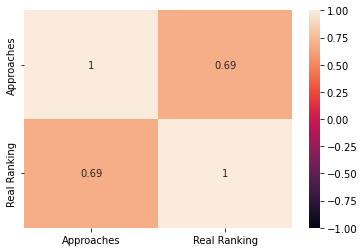

In [194]:
newmerged_df_22, real22, dfreal22 = realt(realt22,sorting22,df22,"Overall")
raw_22 = prediction(newmerged_df_22,sorting22,real22,"Overall")

corr22 = raw_22[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22, vmin=-1, vmax=1, annot=True)
plt.show()

In [195]:
mse22 = mse(raw_22["Approaches"], raw_22["Estimated Ranking"])

Model with low test power

mse value: 5.494276533616057 

cohens d: -2.243193131048567e-14


In [196]:
replace_values22 = {1 : 20, 2 : 19, 3: 18, 4 : 17, 5 : 16, 6 : 15, 7 : 14, 8 : 13, 9 : 12, 10 : 11, 11 : 10, 12 : 9 , 13 : 8, 14 : 7, 15 : 6, 16 : 5 , 17 : 4, 18 : 3, 19 : 2, 20 : 1}                                                                                          
new_22 = raw_22.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22 = new_22[['Real Ranking', 'Estimated Ranking']].copy()
new22

,Real Ranking,Estimated Ranking
Trabzonspor,1,3
Fenerbahçe SK,2,1
İttifak Holding Konyaspor,3,9
İstanbul Başakşehir FK,4,5
Aytemiz Alanyaspor,5,11
Beşiktaş JK,6,2
Antalyaspor,7,8
Fatih Karagümrük S.K.,8,7
Adana Demirspor,9,10
Demir Grup Sivasspor,10,6


In [197]:
new22.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.742857
Estimated Ranking,0.742857,1.000000


### FIFA 22 - Acceleration

In [198]:
df22_acc = dfmaker(teams22,"Club","Acceleration")
df22_acc

,Teams,Acceleration
16,Trabzonspor,69.481481
5,Fenerbahçe SK,69.000000
2,Beşiktaş JK,68.961538
6,Galatasaray SK,68.266667
9,Atakaş Hatayspor,67.391304
1,Adana Demirspor,66.538462
4,Fatih Karagümrük S.K.,66.193548
7,Gazişehir Gaziantep F.K.,65.966667
18,Çaykur Rizespor,65.666667
15,Demir Grup Sivasspor,65.375000


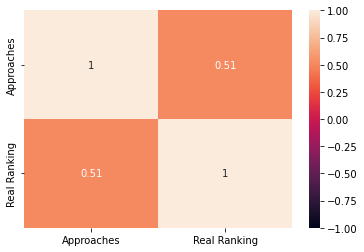

In [199]:
newmerged_df_22_acc, real22_acc, dfreal22_acc = realt(realt22,sorting22,df22_acc,"Acceleration")
raw_22_acc = prediction(newmerged_df_22_acc,sorting22,real22_acc,"Acceleration")

corr22_acc = raw_22_acc[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22_acc, vmin=-1, vmax=1, annot=True)
plt.show()

In [200]:
mse22_acc = mse(raw_22_acc["Approaches"], raw_22_acc["Estimated Ranking"])

Model with low test power

mse value: 8.31208886474568 

cohens d: 2.957442850051444e-15


In [201]:
new_22_acc = raw_22_acc.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22_acc = new_22_acc[['Real Ranking', 'Estimated Ranking']].copy()
new22_acc

,Real Ranking,Estimated Ranking
Trabzonspor,1,1
Fenerbahçe SK,2,2
İttifak Holding Konyaspor,3,14
İstanbul Başakşehir FK,4,13
Aytemiz Alanyaspor,5,17
Beşiktaş JK,6,3
Antalyaspor,7,12
Fatih Karagümrük S.K.,8,7
Adana Demirspor,9,6
Demir Grup Sivasspor,10,10


In [202]:
new22_acc.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.491729
Estimated Ranking,0.491729,1.000000


### FIFA 22 - Finishing

In [203]:
df22_fns = dfmaker(teams22,"Club","Finishing")
df22_fns

,Teams,Finishing
5,Fenerbahçe SK,52.448276
16,Trabzonspor,52.444444
15,Demir Grup Sivasspor,51.875000
2,Beşiktaş JK,51.076923
12,Yukatel Kayserispor,49.384615
6,Galatasaray SK,48.966667
4,Fatih Karagümrük S.K.,48.677419
18,Çaykur Rizespor,48.629630
1,Adana Demirspor,48.615385
9,Atakaş Hatayspor,48.347826


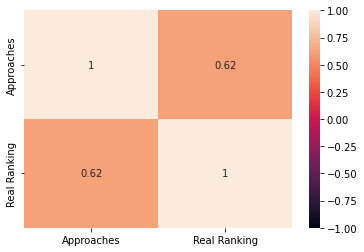

In [204]:
newmerged_df_22_fns, real22_fns, dfreal22_fns = realt(realt22,sorting22,df22_fns,"Finishing")
raw_22_fns = prediction(newmerged_df_22_fns,sorting22,real22_fns,"Finishing")

corr22_fns = raw_22_fns[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22_fns, vmin=-1, vmax=1, annot=True)
plt.show()

In [205]:
mse22_fns = mse(raw_22_fns["Approaches"], raw_22_fns["Estimated Ranking"])

Model with low test power

mse value: 6.130999191252858 

cohens d: -3.7305075792519e-15


In [206]:
new_22_fns = raw_22_fns.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22_fns = new_22_fns[['Real Ranking', 'Estimated Ranking']].copy()
new22_fns

,Real Ranking,Estimated Ranking
Trabzonspor,1,2
Fenerbahçe SK,2,1
İttifak Holding Konyaspor,3,18
İstanbul Başakşehir FK,4,11
Aytemiz Alanyaspor,5,12
Beşiktaş JK,6,4
Antalyaspor,7,13
Fatih Karagümrük S.K.,8,7
Adana Demirspor,9,9
Demir Grup Sivasspor,10,3


In [207]:
new22_fns.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.512782
Estimated Ranking,0.512782,1.000000


### FIFA 22 - Dribbling

In [208]:
df22_drb = dfmaker(teams22,"Club","Dribbling")
df22_drb

,Teams,Dribbling
5,Fenerbahçe SK,65.068966
16,Trabzonspor,63.777778
2,Beşiktaş JK,63.769231
15,Demir Grup Sivasspor,61.041667
10,İstanbul Başakşehir FK,61.000000
0,Antalyaspor,60.884615
1,Adana Demirspor,60.423077
6,Galatasaray SK,60.200000
4,Fatih Karagümrük S.K.,60.193548
9,Atakaş Hatayspor,59.260870


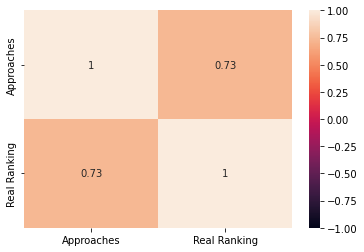

In [209]:
newmerged_df_22_drb, real22_drb, dfreal22_drb = realt(realt22,sorting22,df22_drb,"Dribbling")
raw_22_drb = prediction(newmerged_df_22_drb,sorting22,real22_drb,"Dribbling")

corr22_drb = raw_22_drb[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22_drb, vmin=-1, vmax=1, annot=True)
plt.show()

In [210]:
mse22_drb = mse(raw_22_drb["Approaches"], raw_22_drb["Estimated Ranking"])

Model with low test power

mse value: 3.916523927894427 

cohens d: -8.975937509565955e-15


In [211]:
new_22_drb = raw_22_drb.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22_drb = new_22_drb[['Real Ranking', 'Estimated Ranking']].copy()
new22_drb

,Real Ranking,Estimated Ranking
Trabzonspor,1,2
Fenerbahçe SK,2,1
İttifak Holding Konyaspor,3,17
İstanbul Başakşehir FK,4,5
Aytemiz Alanyaspor,5,12
Beşiktaş JK,6,3
Antalyaspor,7,6
Fatih Karagümrük S.K.,8,9
Adana Demirspor,9,7
Demir Grup Sivasspor,10,4


In [212]:
new22_drb.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.714286
Estimated Ranking,0.714286,1.000000


### FIFA 22 -  Strength

In [213]:
df22_str = dfmaker(teams22,"Club","Strength")
df22_str

,Teams,Strength
15,Demir Grup Sivasspor,70.958333
17,Altay SK,70.392857
10,İstanbul Başakşehir FK,70.074074
6,Galatasaray SK,69.733333
18,Çaykur Rizespor,67.925926
13,İttifak Holding Konyaspor,67.750000
1,Adana Demirspor,67.730769
19,Göztepe SK,67.555556
2,Beşiktaş JK,67.115385
5,Fenerbahçe SK,66.965517


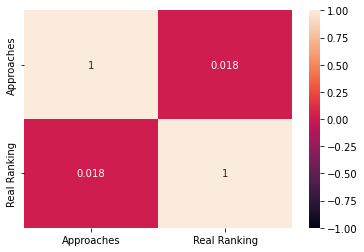

In [214]:
newmerged_df_22_str, real22_str, dfreal22_str = realt(realt22,sorting22,df22_str,"Strength")
raw_22_str = prediction(newmerged_df_22_str,sorting22,real22_str,"Strength")

corr22_str = raw_22_str[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22_str, vmin=-1, vmax=1, annot=True)
plt.show()

In [215]:
mse22_str = mse(raw_22_str["Approaches"], raw_22_str["Estimated Ranking"])

Model with low test power

mse value: 32.08844094084376 

cohens d: 1.5679272511706876e-17


In [216]:
new_22_str = raw_22_str.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22_str = new_22_str[['Real Ranking', 'Estimated Ranking']].copy()
new22_str

,Real Ranking,Estimated Ranking
Trabzonspor,1,14
Fenerbahçe SK,2,10
İttifak Holding Konyaspor,3,6
İstanbul Başakşehir FK,4,3
Aytemiz Alanyaspor,5,11
Beşiktaş JK,6,9
Antalyaspor,7,16
Fatih Karagümrük S.K.,8,20
Adana Demirspor,9,7
Demir Grup Sivasspor,10,1


In [217]:
new22_str.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.025564
Estimated Ranking,0.025564,1.000000


### FIFA 22 - Stamina

In [218]:
df22_stm = dfmaker(teams22,"Club","Stamina")
df22_stm

,Teams,Stamina
5,Fenerbahçe SK,69.000000
6,Galatasaray SK,68.033333
15,Demir Grup Sivasspor,67.708333
16,Trabzonspor,66.777778
10,İstanbul Başakşehir FK,66.703704
9,Atakaş Hatayspor,65.478261
0,Antalyaspor,65.038462
2,Beşiktaş JK,63.884615
1,Adana Demirspor,63.384615
17,Altay SK,63.178571


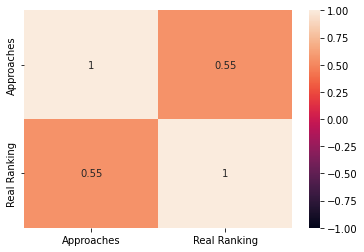

In [219]:
newmerged_df_22_stm, real22_stm, dfreal22_stm = realt(realt22,sorting22,df22_stm,"Stamina")
raw_22_stm = prediction(newmerged_df_22_stm,sorting22,real22_stm,"Stamina")

corr22_stm = raw_22_stm[["Approaches","Real Ranking"]].corr()
sns.heatmap(corr22_stm, vmin=-1, vmax=1, annot=True)
plt.show()

In [220]:
mse22_stm = mse(raw_22_stm["Approaches"], raw_22_stm["Estimated Ranking"])

Model with low test power

mse value: 7.033233602247137 

cohens d: -3.2150958782870166e-15


In [221]:
new_22_stm = raw_22_stm.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True)                                                                                             
new22_stm = new_22_stm[['Real Ranking', 'Estimated Ranking']].copy()
new22_stm

,Real Ranking,Estimated Ranking
Trabzonspor,1,4
Fenerbahçe SK,2,1
İttifak Holding Konyaspor,3,11
İstanbul Başakşehir FK,4,5
Aytemiz Alanyaspor,5,14
Beşiktaş JK,6,8
Antalyaspor,7,7
Fatih Karagümrük S.K.,8,17
Adana Demirspor,9,9
Demir Grup Sivasspor,10,3


In [222]:
new22_stm.corr()

,Real Ranking,Estimated Ranking
Real Ranking,1.000000,0.553383
Estimated Ranking,0.553383,1.000000


#### Analysis of obtained correlations

Calculating the average of the correlations for each feature and determine the most optimal feature for the prediction model.

In [273]:
average_corr_overall = (corr17 + corr18 + corr19 + corr20 + corr21 + corr22) /6
average_corr_acceleration = (corr17_acc + corr18_acc + corr19_acc + corr20_acc + corr21_acc + corr22_acc) /6
average_corr_finishing = (corr17_fns + corr18_fns + corr19_fns + corr20_fns + corr21_fns + corr22_fns) /6
average_corr_dribbling = (corr17_drb + corr18_drb + corr19_drb + corr20_drb + corr21_drb + corr22_drb) /6
average_corr_strength = (corr17_str + corr18_str + corr19_str + corr20_str + corr21_str + corr22_str) /6
average_corr_stamina = (corr17_stm + corr18_stm + corr19_stm + corr20_stm + corr21_stm + corr22_stm) /6

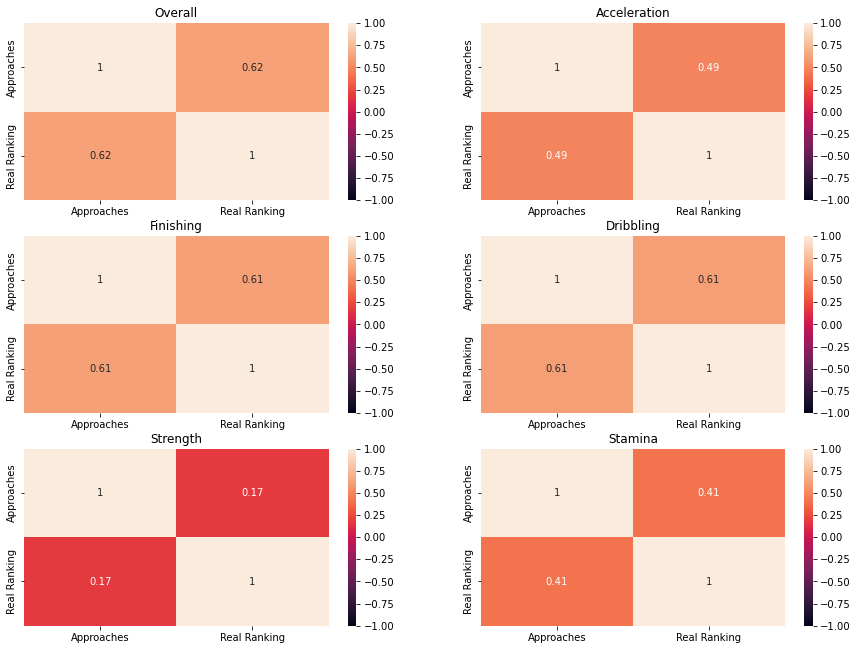

In [274]:
titles1 = ["Overall", "Acceleration", "Finishing", "Dribbling", "Strength", "Stamina"]
corr_matrices1 = [average_corr_overall, average_corr_acceleration, average_corr_finishing, average_corr_dribbling, average_corr_strength, average_corr_stamina]

plt.figure(figsize=(15,15))

for i in range(6):
    plt.subplot(4, 2, i+1, title = titles1[i])
    sns.heatmap(corr_matrices1[i], vmin=-1, vmax=1, annot=True)

plt.show()

## Results About These Correlations

We made predictions for attributes such as Overall, Acceleration, Finishing, Stamina, Dribbling, Strength, Stamina and obtained the correlation strengths for each attribute one by one and measured the strength of the predictions. According to these results, we realized that Dribbling and Finishing are important attributes in determining the league result, which gave us an idea of how these attributes affect the league ranking. Since the predictions we made with the Overall attribute had the strongest correlation values on average, we decided to make a prediction based on the Overall attribute.

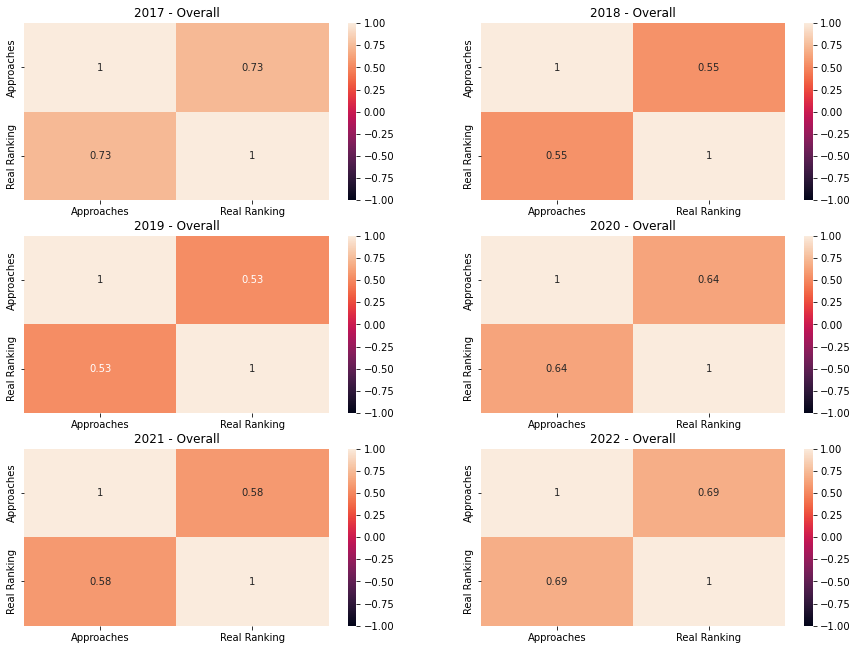

In [225]:
titles2 = ["2017 - Overall", "2018 - Overall", "2019 - Overall", "2020 - Overall", "2021 - Overall", "2022 - Overall"]
corr_matrices2 = [corr17, corr18, corr19, corr20, corr21, corr22]

plt.figure(figsize=(15,15))

for i in range(6):
    plt.subplot(4, 2, i+1, title = titles2[i])
    sns.heatmap(corr_matrices2[i], vmin=-1, vmax=1, annot=True)

plt.show()

Correlations of prediction models based on the "Overall" attribute by years. For the Overall attribute, we can observe that the testing power of 2017 is much higher compared to other years.

# FIFA 23

Ingesting player attributes data for FIFA 2023

In [226]:
data23 = pd.read_csv("Fifa 23 Players Data.csv")
data23 = data23.sort_values(by="Overall", ascending = False)
data23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [227]:
data23 = data23[["Full Name", "Age", "Overall","Acceleration","Finishing","Dribbling","Strength","Stamina", "Club Name", "Height(in cm)"]]
antalya23 = data23[data23["Club Name"] == "Antalyaspor"]
adanademir23 = data23[data23["Club Name"] == "Adana Demirspor"]
besiktas23 = data23[data23["Club Name"] == "Beşiktaş JK"]
alanya23 = data23[data23["Club Name"] == "Aytemiz Alanyaspor"]
karagumruk23 = data23[data23["Club Name"] == "Fatih Karagümrük S.K."]
fenerbahce23 = data23[data23["Club Name"] == "Fenerbahçe SK"]
galatasaray23 = data23[data23["Club Name"] == "Galatasaray SK"]
gaziantep23 = data23[data23["Club Name"] == "Gazişehir Gaziantep F.K."]
giresun23 = data23[data23["Club Name"] == "GZT Giresunspor"]
hatay23 = data23[data23["Club Name"] == "Atakaş Hatayspor"]
basaksehir23 = data23[data23["Club Name"] == "İstanbul Başakşehir FK"]
kasimpasa23 = data23[data23["Club Name"] == "Kasimpaşa SK"]
kayseri23 = data23[data23["Club Name"] == "Yukatel Kayserispor"]
konya23 = data23[data23["Club Name"] == "İttifak Holding Konyaspor"]
sivas23 = data23[data23["Club Name"] == "Demir Grup Sivasspor"]
trabzon23 = data23[data23["Club Name"] == "Trabzonspor"]
ankaragucu23 = data23[data23["Club Name"] == "MKE Ankaragücü"]
istanbul23 = data23[data23["Club Name"] == "İstanbulspor"]
umraniye23 = data23[data23["Club Name"] == "Ümraniyespor"]
data23

,Full Name,Age,Overall,Acceleration,Finishing,Dribbling,Strength,Stamina,Club Name,Height(in cm)
0,Lionel Messi,35,91,87,90,95,68,70,Paris Saint-Germain,169
2,Robert Lewandowski,33,91,76,94,85,87,76,FC Barcelona,185
3,Kevin De Bruyne,31,91,76,85,88,74,88,Manchester City,181
4,Kylian Mbappé,23,91,97,93,93,76,87,Paris Saint-Germain,182
1,Karim Benzema,34,91,79,92,87,82,82,Real Madrid CF,185
...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,21,47,69,49,50,31,32,Sligo Rovers,174
18535,Dejiang Yang,17,47,52,33,42,35,34,Guangzhou FC,175
18536,Liam Mullan,18,47,70,36,52,31,36,Derry City,170
18537,Daithí McCallion,17,47,53,20,27,34,49,Derry City,178


In [228]:
teams23 = [antalya23, adanademir23, besiktas23, alanya23, karagumruk23, fenerbahce23, galatasaray23, gaziantep23, 
           giresun23, hatay23, basaksehir23, kasimpasa23, kayseri23, konya23, sivas23, trabzon23, ankaragucu23, istanbul23,
           umraniye23]

In [229]:
sorting23 = []
for i in range(19):
    sorting23.append(i+1)
    i+1
sorting23.sort(reverse = True)

In [230]:
sorting23F = []
for i in range(19):
    sorting23F.append(i+1)
    i+1
sorting23F.sort(reverse = False)

Creating the league table based on the overall attribute.

In [231]:
df23 = dfmaker(teams23,"Club Name","Overall")
df23

,Teams,Overall
5,Fenerbahçe SK,73.259259
15,Trabzonspor,72.344828
6,Galatasaray SK,71.724138
2,Beşiktaş JK,70.608696
10,İstanbul Başakşehir FK,70.440000
0,Antalyaspor,69.200000
1,Adana Demirspor,68.633333
11,Kasimpaşa SK,67.640000
16,MKE Ankaragücü,67.580645
14,Demir Grup Sivasspor,67.148148


In [232]:
pred23 = prediction(df23,sorting23,df23["Teams"],"Overall")
pred_23 = pred23.iloc[:,:-1]
pred_23 = pred_23.rename(columns={'Real Ranking': 'Sorting'})
pred_23["Overalls"] = np.array(df23["Overall"])
pred_23

,Approaches,Sorting,Overalls
Teams,,,
Fenerbahçe SK,20.298873,19,73.259259
Trabzonspor,18.570821,18,72.344828
Galatasaray SK,17.397869,17,71.724138
Beşiktaş JK,15.289956,16,70.608696
İstanbul Başakşehir FK,14.971163,15,70.440000
Antalyaspor,12.627866,14,69.200000
Adana Demirspor,11.557004,13,68.633333
Kasimpaşa SK,9.679847,12,67.640000
MKE Ankaragücü,9.567681,11,67.580645


Scoreboard prediction for the 2022/2023 season based on overall attribute.

In [233]:
replace_values23 = {1 : 19, 2 : 18, 3: 17, 4 : 16, 5 : 15, 6 : 14, 7 : 13, 8 : 12, 9 : 11, 10 : 10, 11 : 9, 12 : 8 , 13 : 7, 14 : 6, 15 : 5, 16 : 4 , 17 : 3, 18 : 2, 19 : 1}                                                                                          
pred_23 = pred_23.replace(replace_values23).sort_values(by = "Sorting", ascending = True).drop(['Approaches'], axis=1)
pred_23.rename(columns={'Sorting': 'Positions'})

,Positions,Overalls
Teams,,
Fenerbahçe SK,1,73.259259
Trabzonspor,2,72.344828
Galatasaray SK,3,71.724138
Beşiktaş JK,4,70.608696
İstanbul Başakşehir FK,5,70.440000
Antalyaspor,6,69.200000
Adana Demirspor,7,68.633333
Kasimpaşa SK,8,67.640000
MKE Ankaragücü,9,67.580645


# Attendance - Team Success Correlation

The first thing we need to do is to extract what we need from the data we have. The first season we evaluated is the 2016-2017 season and the last season is the 2021-2022 season. In the dates between these seasons, the start date is August 19, 2016 and the end date is May 22, 2022. We excluded all matches outside of these dates from our DataFrame. To give additional information, in the 2020-2021 season, due to the Coronavirus pandemic, there were no spectators in the matches, so this season was skipped for this correlation calculation.

For each season, we obtained a new dataframe with team names and average attendance.

We then both visualized this new dataframe and used the Seaborn library to correlate teams' results that season with their average home attendance. 

Since we think that there is a positive correlation between attendance and league result ranking, we used a kind of scoring system instead of ranking. The system is very simple to understand, if a team is champion in an 18-team league, it gets 18 points, and if it is second, it gets 17 points. 

In [234]:
data4 = pd.read_csv("games.csv")

In [235]:
trlig = data4[data4["competition_id"] == "TR1"]
f_trlig = trlig[trlig["date"] >= "2016-08-19"]
f_trlig.sort_values(by = "date")
nf_trlig = f_trlig[f_trlig["attendance"] != 0]
nf_trlig.sort_values(by = "date", inplace = True)
nf_trlig = nf_trlig[nf_trlig["date"] <= "2022-05-22"]
nf_trlig.groupby("club_home_pretty_name")

## 2016/2017 Season

In [236]:
sorting = []
for i in range(18):
    sorting.append(i+1)
    i+1
sorting.sort(reverse = False)

In [237]:
attendance16 = nf_trlig[nf_trlig["date"] <= "2017-06-04"]
cor16 = attendance16[["club_home_pretty_name", "attendance"]]
mean_attendance16 = cor16.groupby("club_home_pretty_name")["attendance"].mean().reset_index()

ct16 = ["Besiktas Istanbul", "Istanbul Basaksehir Fk", "Fenerbahce Istanbul", "Galatasaray Istanbul", "Antalyaspor", 
        "Trabzonspor", "Akhisarspor", "Genclerbirligi Ankara", "Konyaspor", "Kasimpasa", "Kardemir Karabukspor", 
        "Alanyaspor", "Ankaraspor", "Bursaspor", "Kayserispor", "Caykur Rizespor", "Gaziantepspor", "Adanaspor"]

mean_attendance16.rename(columns = {"club_home_pretty_name": "Teams"}, inplace = True)
dfr16 = pd.DataFrame({"Teams": ct16, "Real Ranking": sorting17})
cmdf16 = pd.merge(mean_attendance16, dfr16, on = "Teams")
nmdf_16 = cmdf16.corr()
nmdf16 = cmdf16[["attendance", "Real Ranking"]]
nmdf16.columns = ["attendance", "Real Ranking"]
nmdf16.index = cmdf16["Teams"].tolist()
nmdf16.sort_values(by = "Real Ranking", ascending = False, inplace = True)

In [238]:
nmdf16['Real Ranking'] = np.array(sorting)
nmdf16

,attendance,Real Ranking
Besiktas Istanbul,30447.705882,1
Istanbul Basaksehir Fk,3208.153846,2
Fenerbahce Istanbul,16484.941176,3
Galatasaray Istanbul,21351.000000,4
Antalyaspor,12179.625000,5
Trabzonspor,17251.933333,6
Akhisarspor,2517.461538,7
Genclerbirligi Ankara,2820.833333,8
Konyaspor,15722.642857,9
Kasimpasa,1390.187500,10


## 2017/2018 Season

In [239]:
attendance17 = nf_trlig[(nf_trlig["date"] <= "2018-05-20") & (nf_trlig["date"] >= "2017-08-11")]
cor17 = attendance17[["club_home_pretty_name", "attendance"]]
mean_attendance17 = cor17.groupby("club_home_pretty_name")["attendance"].mean().reset_index()

ct17 = ["Galatasaray Istanbul", "Fenerbahce Istanbul", "Istanbul Basaksehir Fk", "Besiktas Istanbul", "Trabzonspor", 
           "Goztepe", "Sivasspor", "Kasimpasa", "Kayserispor", "Yeni Malatyaspor", "Akhisarspor", "Alanyaspor",
          "Bursaspor", "Antalyaspor", "Konyaspor", "Ankaraspor", "Genclerbirligi Ankara", "Kardemir Karabukspor"]

mean_attendance17.rename(columns = {"club_home_pretty_name": "Teams"}, inplace = True)

dfr17 = pd.DataFrame({"Teams": ct17, "Real Ranking": sorting17})
cmdf17 = pd.merge(mean_attendance17, dfr17, on = "Teams")
nmdf_17 = cmdf17.corr()
nmdf17 = cmdf17[["attendance", "Real Ranking"]]
nmdf17.columns = ["attendance", "Real Ranking"]
nmdf17.index = cmdf17["Teams"].tolist()
nmdf17.sort_values(by = "Real Ranking", ascending = False, inplace = True)

In [240]:
nmdf17['Real Ranking'] = np.array(sorting)
nmdf17

,attendance,Real Ranking
Galatasaray Istanbul,41050.470588,1
Fenerbahce Istanbul,33772.571429,2
Istanbul Basaksehir Fk,5472.000000,3
Besiktas Istanbul,26983.333333,4
Trabzonspor,24849.529412,5
Goztepe,8193.555556,6
Sivasspor,13158.333333,7
Kasimpasa,3223.000000,8
Kayserispor,21824.230769,9
Yeni Malatyaspor,17647.000000,10


## 2018/2019 Season


In [241]:
attendance18 = nf_trlig[(nf_trlig["date"] <= "2019-05-26") & (nf_trlig["date"] >= "2018-08-10")]
cor18 = attendance18[["club_home_pretty_name", "attendance"]]
mean_attendance18 = cor18.groupby("club_home_pretty_name")["attendance"].mean().reset_index()

ct18 = ["Galatasaray Istanbul", "Istanbul Basaksehir Fk", "Besiktas Istanbul", "Trabzonspor", "Yeni Malatyaspor", 
           "Fenerbahce Istanbul", "Antalyaspor", "Konyaspor", "Alanyaspor", "Kayserispor", "Caykur Rizespor",
          "Sivasspor", "Mke Ankaragucu", "Kasimpasa", "Goztepe", "Bursaspor", "Buyuksehir Belediye Erzurumspor", 
           "Akhisarspor"]

mean_attendance18.rename(columns = {"club_home_pretty_name": "Teams"}, inplace = True)

dfr18 = pd.DataFrame({"Teams": ct18, "Real Ranking": sorting18})
cmdf18 = pd.merge(mean_attendance18, dfr18, on = "Teams")
nmdf_18 = cmdf18.corr()
nmdf18 = cmdf18[["attendance", "Real Ranking"]]
nmdf18.columns = ["attendance", "Real Ranking"]
nmdf18.index = cmdf18["Teams"].tolist()
nmdf18.sort_values(by = "Real Ranking", ascending = False, inplace = True)

In [242]:
nmdf18['Real Ranking'] = np.array(sorting)
nmdf18

,attendance,Real Ranking
Galatasaray Istanbul,36165.764706,1
Istanbul Basaksehir Fk,4050.000000,2
Besiktas Istanbul,29871.562500,3
Trabzonspor,25686.882353,4
Yeni Malatyaspor,7911.300000,5
Fenerbahce Istanbul,35798.437500,6
Antalyaspor,9900.636364,7
Konyaspor,17471.900000,8
Alanyaspor,4887.777778,9
Kayserispor,9868.600000,10


## 2019/2020 Season

In [243]:
attendance19 = nf_trlig[(nf_trlig["date"] <= "2020-07-26") & (nf_trlig["date"] >= "2019-08-16")]
cor19 = attendance19[["club_home_pretty_name", "attendance"]]
mean_attendance19 = cor19.groupby("club_home_pretty_name")["attendance"].mean().reset_index()

mean_attendance19

ct19 = ["Istanbul Basaksehir Fk", "Trabzonspor", "Besiktas Istanbul", "Sivasspor", "Alanyaspor", 
           "Galatasaray Istanbul", "Fenerbahce Istanbul", "Gaziantep Fk", "Antalyaspor", "Kasimpasa", "Goztepe",
          "Genclerbirligi Ankara", "Konyaspor", "Denizlispor", "Caykur Rizespor", "Yeni Malatyaspor", 
           "Kayserispor", "Mke Ankaragucu"]

mean_attendance19.rename(columns = {"club_home_pretty_name": "Teams"}, inplace = True)

dfr19 = pd.DataFrame({"Teams": ct19, "Real Ranking": sorting19})
cmdf19 = pd.merge(mean_attendance19, dfr19, on = "Teams")
nmdf_19 = cmdf19.corr()
nmdf19 = cmdf19[["attendance", "Real Ranking"]]
nmdf19.columns = ["attendance", "Real Ranking"]
nmdf19.index = cmdf19["Teams"].tolist()
nmdf19.sort_values(by = "Real Ranking", ascending = False, inplace = True)

In [244]:
nmdf19['Real Ranking'] = np.array(sorting)
nmdf19

,attendance,Real Ranking
Istanbul Basaksehir Fk,2892.461538,1
Trabzonspor,29833.307692,2
Besiktas Istanbul,28238.538462,3
Sivasspor,11917.615385,4
Alanyaspor,5309.000000,5
Galatasaray Istanbul,34989.538462,6
Fenerbahce Istanbul,38143.416667,7
Gaziantep Fk,8618.000000,8
Antalyaspor,11534.166667,9
Kasimpasa,3033.416667,10


## 2020/2021 Season

Due to the coronavirus pandemic, no spectators have been allowed to attend matches this season.

## 2021/2022 Season

In [245]:
sorting22F = []
for i in range(20):
    sorting22F.append(i+1)
    i+1
sorting22F.sort(reverse = False)

In [246]:
attendance21 = nf_trlig[(nf_trlig["date"] <= "2022-05-22") & (nf_trlig["date"] >= "2021-08-13")]
cor21 = attendance21[["club_home_pretty_name", "attendance"]]
mean_attendance21 = cor21.groupby("club_home_pretty_name")["attendance"].mean().reset_index()

ct21 = ["Trabzonspor", "Fenerbahce Istanbul", "Konyaspor", "Istanbul Basaksehir Fk", "Alanyaspor", 
           "Besiktas Istanbul", "Antalyaspor", "Fatih Karagumruk", "Adana Demirspor",
           "Sivasspor", "Kasimpasa", "Hatayspor", "Galatasaray Istanbul", "Kayserispor",
           "Gaziantep Fk", "Giresunspor", "Caykur Rizespor", "Altay Sk", "Goztepe",
           "Yeni Malatyaspor"]

mean_attendance21.rename(columns = {"club_home_pretty_name": "Teams"}, inplace = True)

dfr21 = pd.DataFrame({"Teams": ct21, "Real Ranking": sorting22})
cmdf21 = pd.merge(mean_attendance21, dfr21, on = "Teams")
nmdf_21 = cmdf21.corr()
nmdf21 = cmdf21[["attendance", "Real Ranking"]]
nmdf21.columns = ["attendance", "Real Ranking"]
nmdf21.index = cmdf21["Teams"].tolist()
nmdf21.sort_values(by = "Real Ranking", ascending = False, inplace = True)

In [247]:
nmdf21['Real Ranking'] = np.array(sorting22F)
nmdf21

,attendance,Real Ranking
Trabzonspor,28873.736842,1
Fenerbahce Istanbul,24722.315789,2
Konyaspor,7992.894737,3
Istanbul Basaksehir Fk,1034.388889,4
Alanyaspor,1933.631579,5
Besiktas Istanbul,18506.421053,6
Antalyaspor,6322.052632,7
Fatih Karagumruk,601.105263,8
Adana Demirspor,13513.631579,9
Sivasspor,3267.526316,10


## Showing Heatmaps

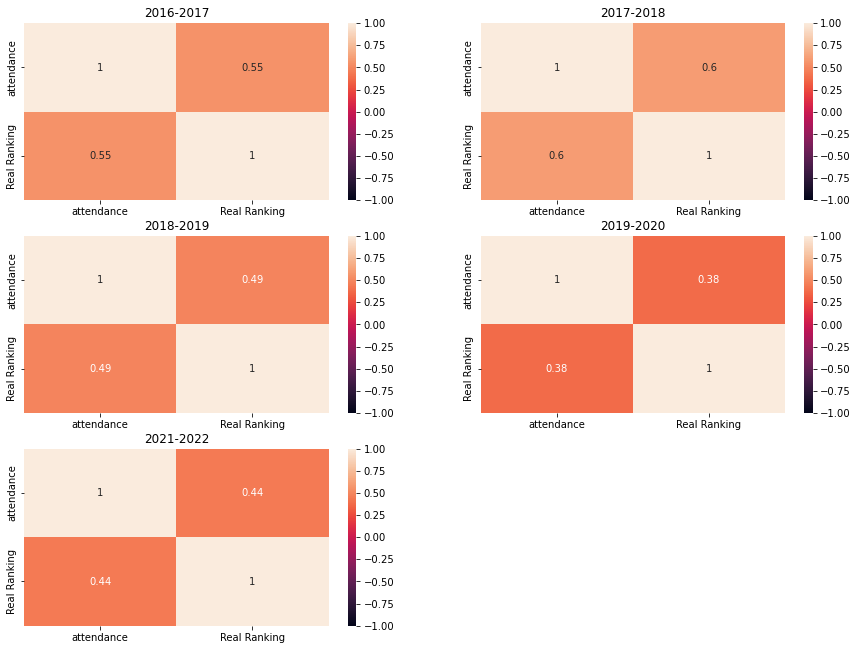

In [248]:
titles3 = ["2016-2017", "2017-2018", "2018-2019", "2019-2020", "2021-2022"]
corr_matrices3 = [nmdf_16, nmdf_17, nmdf_18, nmdf_19, nmdf_21]

plt.figure(figsize=(15,15))

for i in range(5):
    plt.subplot(4, 2, i+1, title = titles3[i])
    sns.heatmap(corr_matrices3[i], vmin=-1, vmax=1, annot=True)

plt.show()

## Results About These Correlations

Let's interpret these results. We can say that factors such as the fact that Istanbul Başakşehir, which has continued its rise and stability in recent years but does not have a fan base, always finishes at the top of the league and even becomes champion one year, the relegation of a club like Bursaspor, which has a large fan base and spends almost every home game close to full capacity, the emergence of one or two surprise teams from Anatolia every year and pushing for the top, the fact that the big teams sometimes finish the league in the sixth or seventh places, sometimes falling far below expectations, have seriously reduced the strength of this correlation.

## Market Value - Team Success Correlation

The next question is, what is the correlation between the market value of the teams and their finishing position in the league? 

Has the team with the most expensive players always been champions? Do relegated teams always have the lowest market value? To answer these questions, let's analyze the correlation with Seaborn again. To do this, we first create a new dataframe with the market capitalization of the teams and the order in which they finished in the league. We will do this for each year separately. For the finishing order, we will use the same scoring system as in the correlation case, where we take into account attendances. 

## 2017/2018 Season

In [249]:
meanvalue18 = data18.groupby("Club")["Value"].sum().reset_index()

In [250]:
t18 = []
for i in range(len(teams18)):
    t18.append(teams18[i].iloc[0]["Club"])

In [251]:
mv18 = meanvalue18[meanvalue18["Club"].isin(t18)]
mv18.rename(columns = {"Club": "Teams"}, inplace = True)

In [252]:
dy18l = newmerged_df_18.index.tolist()
dy18 = newmerged_df_18.copy()
dy18["Teams"] = dy18l
dy18.index = sorting
dy18 = dy18[["Teams", "Real Ranking"]]

In [253]:
mdf18c = pd.merge(dy18, mv18, on = "Teams")
nmdf18c = mdf18c[["Real Ranking", "Value"]]
nmdf18c.columns = ["Real Ranking", "Value"]
nmdf18c.index = mdf18c["Teams"].tolist()
nmdf18c["Value"] = nmdf18c["Value"].astype("int64")
nmdf18corr = nmdf18c.corr()
nmdf18c = nmdf18c.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
nmdf18c

,Real Ranking,Value
Galatasaray SK,1,169859999
Fenerbahçe SK,2,176190000
İstanbul Başakşehir FK,3,94830000
Beşiktaş JK,4,199625000
Trabzonspor,5,117025000
Göztepe,6,45225000
Medicana Sivasspor,7,47280000
Kasimpaşa SK,8,42875000
Kayserispor,9,69940000
Evkur Yeni Malatyaspor,10,31625000


## 2018/2019 Season

In [254]:
t19 = []
for i in range(len(teams19)):
    t19.append(teams19[i].iloc[0]["Club"])

In [255]:
meanvalue19 = data19.groupby("Club")["Value"].sum().reset_index()
mv19 = meanvalue19[meanvalue19["Club"].isin(t19)]
mv19.rename(columns = {"Club": "Teams"}, inplace = True)

In [256]:
dy19l = newmerged_df_19.index.tolist()
dy19 = newmerged_df_19.copy()
dy19["Teams"] = dy19l
dy19.index = sorting
dy19 = dy19[["Teams", "Real Ranking"]]

In [257]:
mdf19c = pd.merge(dy19, mv19, on = "Teams")
nmdf19c = mdf19c[["Real Ranking", "Value"]]
nmdf19c.columns = ["Real Ranking", "Value"]
nmdf19c.index = mdf19c["Teams"].tolist()
nmdf19c["Value"] = nmdf19c["Value"].astype("int64")
nmdf19corr = nmdf19c.corr()
nmdf19c = nmdf19c.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True)                                                                                             
nmdf19c

,Real Ranking,Value
Galatasaray SK,1,149475000
Medipol Başakşehir FK,2,106490000
Beşiktaş JK,3,172950000
Trabzonspor,4,78065000
Yeni Malatyaspor,5,37420000
Fenerbahçe SK,6,140300000
Antalyaspor,7,45615000
Atiker Konyaspor,8,57450000
Alanyaspor,9,58675000
Kayserispor,10,55895000


## 2019/2020 Season

In [258]:
t20 = []
for i in range(len(teams20)):
    t20.append(teams20[i].iloc[0]["club_name"])

In [259]:
meanvalue20 = data20.groupby("club_name")["value_eur"].sum().reset_index()
mv20 = meanvalue20[meanvalue20["club_name"].isin(t20)]
mv20.rename(columns = {"club_name": "Teams"}, inplace = True)

In [260]:
dy20l = newmerged_df_20.index.tolist()
dy20 = newmerged_df_20.copy()
dy20["Teams"] = dy20l
dy20.index = sorting
dy20 = dy20[["Teams", "Real Ranking"]]

In [261]:
mdf20c = pd.merge(dy20, mv20, on = "Teams")
nmdf20c = mdf20c[["Real Ranking", "value_eur"]]
nmdf20c.columns = ["Real Ranking", "value_eur"]
nmdf20c.index = mdf20c["Teams"].tolist()
nmdf20corr = nmdf20c.corr()
nmdf20c["Value"] = nmdf20c["value_eur"].astype("int64")
nmdf20c = nmdf20c.replace(replace_values17).sort_values(by = "Real Ranking", ascending = True).drop(['value_eur'], axis=1)                                                                                             
nmdf20c

,Real Ranking,Value
İstanbul Başakşehir FK,1,141650000
Trabzonspor,2,80025000
Beşiktaş JK,3,156500000
Demir Grup Sivasspor,4,34520000
Aytemiz Alanyaspor,5,62950000
Galatasaray SK,6,165075000
Fenerbahçe SK,7,155575000
Gazişehir Gaziantep F.K.,8,43600000
Antalyaspor,9,34850000
Kasimpaşa SK,10,36340000


## 2020/2021 Season

In [262]:
t21 = []
for i in range(len(teams21)):
    t21.append(teams21[i].iloc[0]["club_name"])

In [263]:
sorting21 = []
for i in range(21):
    sorting21.append(i+1)
    i+1
sorting21.sort(reverse = True)

In [264]:
meanvalue21 = data21.groupby("club_name")["value_eur"].sum().reset_index()
mv21 = meanvalue21[meanvalue21["club_name"].isin(t21)]
mv21.rename(columns = {"club_name": "Teams"}, inplace = True)

In [265]:
dy21l = newmerged_df_21.index.tolist()
dy21 = newmerged_df_21.copy()
dy21["Teams"] = dy21l
dy21.index = sorting21
dy21 = dy21[["Teams", "Real Ranking"]]
dy21["Real Ranking"] = sorting21

In [266]:
mdf21c = pd.merge(dy21, mv21, on = "Teams")
nmdf21c = mdf21c[["Real Ranking", "value_eur"]]
nmdf21c.columns = ["Real Ranking", "value_eur"]
nmdf21c.index = mdf21c["Teams"].tolist()
nmdf21corr = nmdf21c.corr()
nmdf21c["Value"] = nmdf21c["value_eur"].astype("int64")
nmdf21c = nmdf21c.replace(replace_values21).sort_values(by = "Real Ranking", ascending = True).drop(['value_eur'], axis=1)                                                                                             
nmdf21c

,Real Ranking,Value
Beşiktaş JK,1,110925000
Galatasaray SK,2,137425000
Fenerbahçe SK,3,106500000
Trabzonspor,4,97175000
Demir Grup Sivasspor,5,56375000
Atakaş Hatayspor,6,28970000
Aytemiz Alanyaspor,7,46395000
Fatih Karagümrük S.K.,8,29575000
Gazişehir Gaziantep F.K.,9,28575000
Göztepe SK,10,26910000


## 2021/2022 Season

In [267]:
t22 = []
for i in range(len(teams22)):
    t22.append(teams22[i].iloc[0]["Club"])

In [268]:
meanvalue22 = data22.groupby("Club")["ValueEUR"].sum().reset_index()
mv22 = meanvalue22[meanvalue22["Club"].isin(t22)]
mv22.rename(columns = {"Club": "Teams"}, inplace = True)

In [269]:
dy22l = newmerged_df_22.index.tolist()
dy22 = newmerged_df_22.copy()
dy22["Teams"] = dy22l
dy22.index = sorting22
dy22 = dy22[["Teams", "Real Ranking"]]

In [270]:
mdf22c = pd.merge(dy22, mv22, on = "Teams")
nmdf22c = mdf22c[["Real Ranking", "ValueEUR"]]
nmdf22c.columns = ["Real Ranking", "ValueEUR"]
nmdf22c.index = mdf22c["Teams"].tolist()
nmdf22corr = nmdf22c.corr()
nmdf22c["Value"] = nmdf22c["ValueEUR"].astype("int64")
nmdf22c = nmdf22c.replace(replace_values22).sort_values(by = "Real Ranking", ascending = True).drop(['ValueEUR'], axis=1)                                                                                             
nmdf22c

,Real Ranking,Value
Trabzonspor,1,108749999
Fenerbahçe SK,2,163200000
İttifak Holding Konyaspor,3,31750000
İstanbul Başakşehir FK,4,80724999
Aytemiz Alanyaspor,5,50855000
Beşiktaş JK,6,131475000
Antalyaspor,7,44350000
Fatih Karagümrük S.K.,8,69800000
Adana Demirspor,9,65350000
Demir Grup Sivasspor,10,39650000


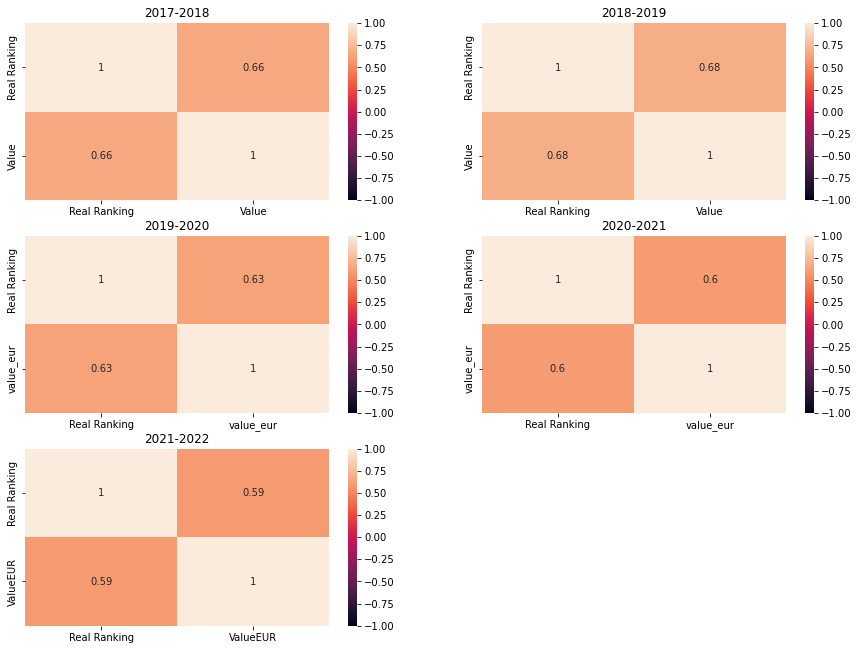

In [271]:
titles4 = ["2017-2018", "2018-2019", "2019-2020", "2020-2021", "2021-2022"]
corr_matrices4 = [nmdf18corr, nmdf19corr, nmdf20corr, nmdf21corr, nmdf22corr]

plt.figure(figsize=(15,15))

for i in range(5):
    plt.subplot(4, 2, i+1, title = titles4[i])
    sns.heatmap(corr_matrices4[i], vmin=-1, vmax=1, annot=True)

plt.show()

## Results About These Correlations

Previously we calculated the correlation between attendance and league results, and here we were curious about the correlation between player prices and league results, so we did our calculations with Seaborn again. When the results are analyzed and the correlation strengths are compared with the results we obtained in the numbers, especially in the attendance numbers, it is clear that the teams with higher value players are more likely to be the favorites. 